<a href="https://www.kaggle.com/code/dataranch/tiktok-popular-songs-feature-importance?scriptVersionId=106682409" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <div style="text-align: center; background-color: blue; color: white; padding: 14px; line-height: 1;border-radius:20px">**TikTok Popular Songs Model Comparison + Feature Importance üìä**</div>
- Preprocessing
    - Detect continuous and categorical variables.
    - Normalize and impute data.
    

- For every target variable in the dataset:
    - Compare performance on 27 models + a TabNet model.
    - Output model performance and processed data in CSV format for every dataset.
    - Save plots + CSVs of XGBoost Feature Importances.
    - Save best performing FastAI model.

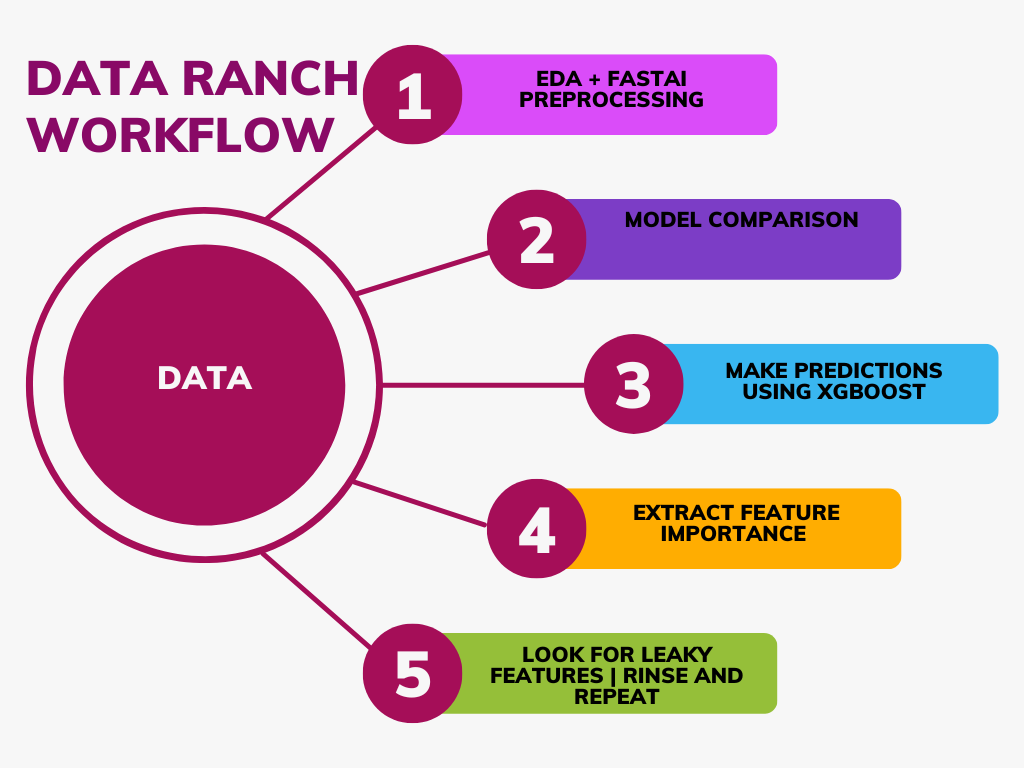

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install lazypredict

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.2/1.2 MB 15.5 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 248.1/248.1 kB 21.0 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 82.8/82.8 kB 7.7 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 303.0/303.0 kB 23.7 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10.1/10.1 MB 67.0 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 269.4/269.4 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  

In [3]:
!pip install --upgrade pandas

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 11.3/11.3 MB 61.0 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.0.5
    Uninstalling pandas-1.0.5:
      Successfully uninstalled pandas-1.0.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
beatrix-jupyterlab 3.1.7 requires google-cloud-bigquery-storage, which is not installed.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.19.1 which is incompatible.
tfx-bsl 1.9.0 requires pyarrow<6,>=1, but you have pyarrow 8.0.0 which is incompatible.
tfx-bsl 1.9.0 requires tensorflow!=2.0.*,!=2.1.*,!=2.2.*,!=2.3.*,!=2.4.*,!=2.5.*,!=2.6.*,!=2.7.*,!=2.8.*,<3,>=1.15.5, but you have tensorflow 2.6.4 which is incompatible.
tensorflow-transform 1.9.0 requires pyarrow<6,>=1, but you have pyarrow

In [4]:
!pip install fast-tabnet

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 41.8/41.8 kB 3.0 MB/s eta 0:00:00


In [5]:
!pip install fastai

  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.3.0
    Uninstalling typing_extensions-4.3.0:
      Successfully uninstalled typing_extensions-4.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-io 0.21.0 requires tensorflow-io-gcs-filesystem==0.21.0, which is not installed.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.19.1 which is incompatible.
tensorflow 2.6.4 requires h5py~=3.1.0, but you have h5py 3.7.0 which is incompatible.
tensorflow 2.6.4 requires numpy~=1.19.2, but you have numpy 1.19.1 which is incompatible.
tensorflow 2.6.4 requires tensorboard<2.7,>=2.6.0, but you have tensorboard 2.10.0 which is incompatible.
tensorflow 2.6.4 requires typing-extensions<3.11,>=3.7, but you have typing-extensions 4.1.1 which is incompatible.
tensorflow-transform 1.9.0 requires pyarrow<6,

In [6]:
#A program that takes a csv and trains models on it. Streamlined model selection.
#==============================================================================

#LazyPredict
import lazypredict
from lazypredict.Supervised import LazyRegressor
from lazypredict.Supervised import LazyClassifier
#Baysian Optimization
from bayes_opt import BayesianOptimization
#Pandas stack
import pandas as pd
import numpy as np
#FastAI
from fastai.tabular.all import *
from fastai.tabular.core import *
#Plots
import matplotlib.pyplot as plt
import seaborn as sns
#System
import os
import sys
import traceback
#Fit an xgboost model
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
#Random
import random

#TabNet
from fast_tabnet.core import *

import shutil

In [7]:
#Project Variables
#===================================================================================================
PROJECT_NAME = 'tiktok-popular-songs-2020'
VARIABLE_FILES = False
#Maximum amount of rows to take
SAMPLE_COUNT = 20000
FASTAI_LEARNING_RATE = 1e-1
AUTO_ADJUST_LEARNING_RATE = False
#Set to True automatically infer if variables are categorical or continuous
ENABLE_BREAKPOINT = True
#When trying to declare a column a continuous variable, if it fails, convert it to a categorical variable
CONVERT_TO_CAT = False
REGRESSOR = True
SEP_DOLLAR = True
SEP_PERCENT = True
SHUFFLE_DATA = True

In [8]:
input_dir = f'../input/{PROJECT_NAME}'
param_dir = f'/kaggle/working/{PROJECT_NAME}'
TARGET = ''
PARAM_DIR = param_dir
print(f'param_dir: {param_dir}')
if not os.path.exists(param_dir):
    os.makedirs(param_dir)
#rename any file in param_dir/file that ends with csv to data.csv
for file in os.listdir(input_dir):
    if file.endswith('.csv'):
        print('CSV!')
        if 'classification_results' not in file and 'regression_results' not in file:
            #os.rename(f'{input_dir}/{file}', f'{param_dir}/data.csv')
            shutil.copy(f'{input_dir}/{file}', f'{param_dir}/data.csv')
        #os.rename(f'{param_dir}/{file}', f'{param_dir}/data.csv')
try:
    df = pd.read_csv(f'{param_dir}/data.csv', nrows=SAMPLE_COUNT)
except:
    print(f'Please place a file named data.csv in {param_dir}')
    #sys.exit()

param_dir: /kaggle/working/tiktok-popular-songs-2020
CSV!


In [9]:
df

track_name               artist_name  artist_pop  \
0                              Say So                  Doja Cat          88   
1                     Blinding Lights                The Weeknd          93   
2    Supalonely (feat. Gus Dapperton)                     BENEE          67   
3                              Savage       Megan Thee Stallion          82   
4                  Moral of the Story                      Ashe          68   
..                                ...                       ...         ...   
287                           Buttons        The Pussycat Dolls          68   
288                          Get Busy                 Sean Paul          79   
289      ROCKSTAR (feat. Roddy Ricch)                    DaBaby          82   
290                          Who Says  Selena Gomez & The Scene          67   
291                   Crystal Dolphin                 Engelwood          50   

                      album  track_pop  danceability  energy  loudness  mode  \
0                  Hot Pink         80          0.79    0.67     -4.58     0   
1               After Hours         90          0.51    0.73     -5.93     1   
2                   Hey u x         63          0.86    0.63     -4.75     1   
3                      Suga         70          0.84    0.74     -5.61     1   
4        Moral of the Story         76          0.57    0.41     -8.62     1   
..                      ...        ...           ...     ...       ...   ...   
287                     PCD         65          0.57    0.82     -4.38     1   
288              Dutty Rock         74          0.73    0.82     -4.14     0   
289        BLAME IT ON BABY         80          0.75    0.69     -7.96     1   
290  When The Sun Goes Down         76          0.68    0.93     -2.92     1   
291                Crust FM         60          0.56    0.78     -6.87     1   

     key  speechiness  acousticness  instrumentalness  liveness  valence  \
0     11         0.16          0.26              0.00      0.09     0.78   
1      1         0.06          0.00              0.00      0.09     0.33   
2      7         0.05          0.29              0.00      0.12     0.84   
3     11         0.33          0.03              0.00      0.10     0.68   
4     10         0.04          0.59              0.00      0.10     0.27   
..   ...          ...           ...               ...       ...      ...   
287    2         0.27          0.18              0.00      0.29     0.41   
288   10         0.04          0.61              0.00      0.16     0.73   
289   11         0.16          0.25              0.00      0.10     0.50   
290    4         0.05          0.08              0.00      0.15     0.74   
291    9         0.18          0.33              0.00      0.41     0.25   

     tempo  time_signature  duration_ms  
0   110.96               4       237893  
1   171.00               4       200040  
2   128.98               4       223488  
3   168.98               4       155497  
4   119.81               4       201084  
..     ...             ...          ...  
287 210.86               4       225560  
288 100.20               4       211666  
289  89.98               4       181733  
290 101.02               4       195613  
291 128.06               4       114660  

[292 rows x 18 columns]

In [10]:
df.isna().sum()

track_name          0
artist_name         0
artist_pop          0
album               0
track_pop           0
danceability        0
energy              0
loudness            0
mode                0
key                 0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
duration_ms         0
dtype: int64

<AxesSubplot:>

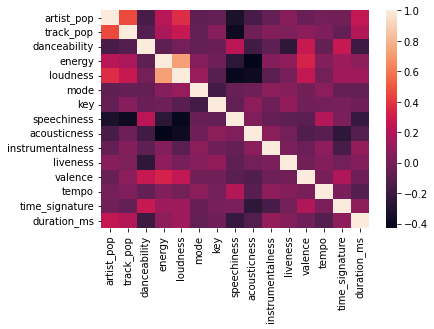

In [11]:
sns.heatmap(df.corr())

In [12]:
df.head().style.background_gradient(cmap = "inferno")

In [13]:
df.describe().T.style.background_gradient(cmap = "viridis")

In [14]:
df.columns

Index(['track_name', 'artist_name', 'artist_pop', 'album', 'track_pop',
       'danceability', 'energy', 'loudness', 'mode', 'key', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'duration_ms'],
      dtype='object')

Target Variable: duration_ms
CATS=====================
['mode', 'key', 'time_signature']
CONTS=====================
['track_name', 'artist_name', 'artist_pop', 'album', 'track_pop', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'track_name_no_dollar']
18
Could not convert track_name to float.
Could not convert artist_name to float.
Could not convert album to float.
Could not convert track_name_no_dollar to float.
Looping through continuous variables to find breakpoint
Error with  track_name
Error with  artist_name
Error with  album
Error with  track_name_no_dollar
Continuous variables that made the cut : ['artist_pop', 'track_pop', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
Categorical variables that made the cut : ['mode', 'key', 'time_signature']
Tabular Object size: 292


  0%|          | 0/42 [00:00<?, ?it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': -0.04303276044619819, 'Adjusted R-Squared': -0.10097902491543143, 'RMSE': 66695.28851770506, 'Time taken': 0.02813577651977539}
{'Model': 'BaggingRegressor', 'R-Squared': -0.17382526115796537, 'Adjusted R-Squared': -0.23903777566674123, 'RMSE': 70753.49649382995, 'Time taken': 0.0277554988861084}
{'Model': 'BayesianRidge', 'R-Squared': -0.010639420057375615, 'Adjusted R-Squared': -0.06678605450500763, 'RMSE': 65651.44628139824, 'Time taken': 0.009490728378295898}
{'Model': 'DecisionTreeRegressor', 'R-Squared': -0.21913472606899864, 'Adjusted R-Squared': -0.2868644330728318, 'RMSE': 72106.10421836804, 'Time taken': 0.008906841278076172}
{'Model': 'DummyRegressor', 'R-Squared': -0.010639409822359447, 'Adjusted R-Squared': -0.06678604370137942, 'RMSE': 65651.445, 'Time taken': 0.009119749069213867}
{'Model': 'ElasticNet', 'R-Squared': -0.00018305873074253576, 'Adjusted R-Squared': -0.055748784215783775, 'RMSE': 65310.939028075176, 'Time taken': 

 17%|‚ñà‚ñã        | 7/42 [00:00<00:00, 45.99it/s]

{'Model': 'ElasticNetCV', 'R-Squared': -0.01063942141366736, 'Adjusted R-Squared': -0.06678605593664888, 'RMSE': 65651.4463254508, 'Time taken': 0.059020280838012695}
{'Model': 'ExtraTreeRegressor', 'R-Squared': -0.1855484606503086, 'Adjusted R-Squared': -0.25141226401977024, 'RMSE': 71105.9325313501, 'Time taken': 0.010815858840942383}


 29%|‚ñà‚ñà‚ñä       | 12/42 [00:00<00:00, 35.85it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': -0.16489514714724796, 'Adjusted R-Squared': -0.22961154421098406, 'RMSE': 70483.84686584557, 'Time taken': 0.11084485054016113}
{'Model': 'GammaRegressor', 'R-Squared': -0.0024302157491662424, 'Adjusted R-Squared': -0.058120783290786626, 'RMSE': 65384.26640095006, 'Time taken': 0.010699987411499023}
{'Model': 'GaussianProcessRegressor', 'R-Squared': -0.11499515240740998, 'Adjusted R-Squared': -0.17693932754115504, 'RMSE': 68957.68457748169, 'Time taken': 0.020272254943847656}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': -0.002586114847486165, 'Adjusted R-Squared': -0.05828534345012426, 'RMSE': 65389.35052138388, 'Time taken': 0.015625715255737305}
{'Model': 'GradientBoostingRegressor', 'R-Squared': -0.08265837929669706, 'Adjusted R-Squared': -0.14280606703540255, 'RMSE': 67950.38186272918, 'Time taken': 0.09542608261108398}


 38%|‚ñà‚ñà‚ñà‚ñä      | 16/42 [00:00<00:01, 24.21it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': -0.06387841260175264, 'Adjusted R-Squared': -0.12298276885740567, 'RMSE': 67358.46462454744, 'Time taken': 0.1308887004852295}
{'Model': 'HuberRegressor', 'R-Squared': -0.017285312560285204, 'Adjusted R-Squared': -0.07380116325807884, 'RMSE': 65866.95218038998, 'Time taken': 0.01743149757385254}
{'Model': 'KNeighborsRegressor', 'R-Squared': -0.2007856024133572, 'Adjusted R-Squared': -0.26749591365854375, 'RMSE': 71561.414, 'Time taken': 0.012145757675170898}
{'Model': 'KernelRidge', 'R-Squared': -9.204807538545772, 'Adjusted R-Squared': -9.771741290687205, 'RMSE': 208616.46890016773, 'Time taken': 0.016054391860961914}
{'Model': 'Lars', 'R-Squared': 0.00415798734640882, 'Adjusted R-Squared': -0.05116656891212412, 'RMSE': 65169.05195188139, 'Time taken': 0.015449762344360352}


 50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 21/42 [00:00<00:00, 27.66it/s]

{'Model': 'LarsCV', 'R-Squared': -0.01063942141366736, 'Adjusted R-Squared': -0.06678605593664888, 'RMSE': 65651.4463254508, 'Time taken': 0.021152496337890625}
{'Model': 'Lasso', 'R-Squared': 0.0041507171335232185, 'Adjusted R-Squared': -0.051174243025725596, 'RMSE': 65169.289837013006, 'Time taken': 0.01304173469543457}
{'Model': 'LassoCV', 'R-Squared': -0.01063942141366736, 'Adjusted R-Squared': -0.06678605593664888, 'RMSE': 65651.4463254508, 'Time taken': 0.07351922988891602}
{'Model': 'LassoLars', 'R-Squared': 0.004046617265347718, 'Adjusted R-Squared': -0.05128412621991085, 'RMSE': 65172.695943396204, 'Time taken': 0.011345386505126953}
{'Model': 'LassoLarsCV', 'R-Squared': -0.01063942141366736, 'Adjusted R-Squared': -0.06678605593664888, 'RMSE': 65651.4463254508, 'Time taken': 0.018843412399291992}
{'Model': 'LassoLarsIC', 'R-Squared': -0.01063942141366736, 'Adjusted R-Squared': -0.06678605593664888, 'RMSE': 65651.4463254508, 'Time taken': 0.010937690734863281}
{'Model': 'Linear

 76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 32/42 [00:01<00:00, 17.71it/s]

{'Model': 'MLPRegressor', 'R-Squared': -9.208205828647992, 'Adjusted R-Squared': -9.775328374683992, 'RMSE': 208651.2015625833, 'Time taken': 0.7059342861175537}
{'Model': 'NuSVR', 'R-Squared': -0.016693564144918405, 'Adjusted R-Squared': -0.07317653993074713, 'RMSE': 65847.79219947544, 'Time taken': 0.019970417022705078}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': -0.006602974466388467, 'Adjusted R-Squared': -0.0625253619367434, 'RMSE': 65520.21074220971, 'Time taken': 0.014051437377929688}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': -0.006602974466388467, 'Adjusted R-Squared': -0.0625253619367434, 'RMSE': 65520.21074220971, 'Time taken': 0.02030634880065918}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -0.11024338091802477, 'Adjusted R-Squared': -0.17192356874680392, 'RMSE': 68810.58931275104, 'Time taken': 0.03545093536376953}
{'Model': 'PoissonRegressor', 'R-Squared': 0.004403493701476191, 'Adjusted R-Squared': -0.05090742331510856, 'RMSE': 65161.018346944

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 42/42 [00:01<00:00, 21.88it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': -0.20706212328651663, 'Adjusted R-Squared': -0.27412113013576755, 'RMSE': 71748.19702954343, 'Time taken': 0.14474773406982422}
{'Model': 'Ridge', 'R-Squared': 0.004107159946075356, 'Adjusted R-Squared': -0.05122022005692051, 'RMSE': 65170.71503256403, 'Time taken': 0.009976863861083984}
{'Model': 'RidgeCV', 'R-Squared': 0.003663068326300256, 'Adjusted R-Squared': -0.05168898343334982, 'RMSE': 65185.243976595586, 'Time taken': 0.009813547134399414}
{'Model': 'SGDRegressor', 'R-Squared': 0.003710620573125434, 'Adjusted R-Squared': -0.0516387893950343, 'RMSE': 65183.68840754147, 'Time taken': 0.010594367980957031}
{'Model': 'SVR', 'R-Squared': -0.022005084653860862, 'Adjusted R-Squared': -0.07878314491240879, 'RMSE': 66019.57271303692, 'Time taken': 0.012298345565795898}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.00415798734640882, 'Adjusted R-Squared': -0.05116656891212412, 'RMSE': 65169.05195188139, 'Time taken': 0.00908207893

LEARNING RATE: 0.1


Better model found at epoch 0 with _rmse value: 208684.21875.
Better model found at epoch 1 with _rmse value: 208681.609375.
Better model found at epoch 2 with _rmse value: 208670.9375.
Better model found at epoch 3 with _rmse value: 208625.671875.
Better model found at epoch 4 with _rmse value: 208480.40625.
Better model found at epoch 5 with _rmse value: 208122.390625.
Better model found at epoch 6 with _rmse value: 207392.6875.
Better model found at epoch 7 with _rmse value: 206890.109375.
Better model found at epoch 8 with _rmse value: 206260.703125.
Better model found at epoch 9 with _rmse value: 205751.859375.
Better model found at epoch 10 with _rmse value: 204705.828125.
Better model found at epoch 11 with _rmse value: 203960.03125.
Better model found at epoch 12 with _rmse value: 203447.03125.
No improvement since epoch 12: early stopping


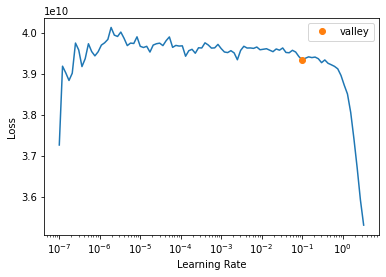

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
     actual  predicted
0 133995.00  200454.42
1 204760.00  191858.75
2  83940.00  233904.39
3 177866.00  194161.31
4 215200.00  226788.67
XGBoost RMSE:  71429.05


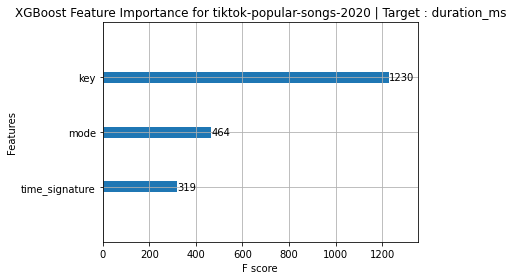

Target Variable: time_signature
CATS=====================
['mode', 'key', 'time_signature']
CONTS=====================
['track_name', 'artist_name', 'artist_pop', 'album', 'track_pop', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'track_name_no_dollar']
19
Could not convert track_name to float.
Could not convert artist_name to float.
Could not convert album to float.
Could not convert track_name_no_dollar to float.
Looping through continuous variables to find breakpoint
Error with  track_name
Error with  artist_name
Error with  album
Error with  track_name_no_dollar
Continuous variables that made the cut : ['artist_pop', 'track_pop', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
Categorical variables that made the cut : ['mode', 'key', 'time_signature']
Tabular Object size: 292


  0%|          | 0/42 [00:00<?, ?it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': -0.4830408058990363, 'Adjusted R-Squared': -0.5369695624771831, 'RMSE': 0.30858544109735775, 'Time taken': 0.020987749099731445}
{'Model': 'BaggingRegressor', 'R-Squared': -0.13352572123751183, 'Adjusted R-Squared': -0.17474483837342136, 'RMSE': 0.26978299498645064, 'Time taken': 0.02624678611755371}
{'Model': 'BayesianRidge', 'R-Squared': -0.03498494277451347, 'Adjusted R-Squared': -0.07262075887540487, 'RMSE': 0.2577898998662216, 'Time taken': 0.009227514266967773}
{'Model': 'DecisionTreeRegressor', 'R-Squared': -0.17041498698244695, 'Adjusted R-Squared': -0.21297553196362684, 'RMSE': 0.2741377343244841, 'Time taken': 0.008805036544799805}
{'Model': 'DummyRegressor', 'R-Squared': -0.010715551551258917, 'Adjusted R-Squared': -0.04746884433494114, 'RMSE': 0.2547495092553387, 'Time taken': 0.007923603057861328}
{'Model': 'ElasticNet', 'R-Squared': -0.010715551551258917, 'Adjusted R-Squared': -0.04746884433494114, 'RMSE': 0.2547495092553387, 'T

 17%|‚ñà‚ñã        | 7/42 [00:00<00:00, 49.45it/s]

{'Model': 'ElasticNetCV', 'R-Squared': -0.07975121931503093, 'Adjusted R-Squared': -0.11901490001739568, 'RMSE': 0.26330598667617583, 'Time taken': 0.05932974815368652}
{'Model': 'ExtraTreeRegressor', 'R-Squared': -0.17041498698244695, 'Adjusted R-Squared': -0.21297553196362684, 'RMSE': 0.2741377343244841, 'Time taken': 0.011162281036376953}


 29%|‚ñà‚ñà‚ñä       | 12/42 [00:00<00:00, 35.33it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': -0.17041498698244517, 'Adjusted R-Squared': -0.21297553196362506, 'RMSE': 0.27413773432448385, 'Time taken': 0.10640931129455566}
{'Model': 'GammaRegressor', 'R-Squared': -0.037524928339540686, 'Adjusted R-Squared': -0.07525310755188763, 'RMSE': 0.2581060307390102, 'Time taken': 0.0111236572265625}
{'Model': 'GaussianProcessRegressor', 'R-Squared': -0.17890295796162947, 'Adjusted R-Squared': -0.22177215643296155, 'RMSE': 0.2751299762668188, 'Time taken': 0.02296137809753418}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': -0.0374576726590401, 'Adjusted R-Squared': -0.07518340621027786, 'RMSE': 0.2580976649746841, 'Time taken': 0.02809929847717285}
{'Model': 'GradientBoostingRegressor', 'R-Squared': -0.16844623040735618, 'Adjusted R-Squared': -0.21093518424035107, 'RMSE': 0.2739070735648627, 'Time taken': 0.09874176979064941}


 38%|‚ñà‚ñà‚ñà‚ñä      | 16/42 [00:00<00:01, 24.01it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': -0.13712842329209884, 'Adjusted R-Squared': -0.1784785477754478, 'RMSE': 0.270211382568624, 'Time taken': 0.11343598365783691}
{'Model': 'HuberRegressor', 'R-Squared': -0.07407407441218039, 'Adjusted R-Squared': -0.11313131348171424, 'RMSE': 0.2626128657607789, 'Time taken': 0.03148627281188965}
{'Model': 'KNeighborsRegressor', 'R-Squared': -0.18148148148148158, 'Adjusted R-Squared': -0.22444444444444467, 'RMSE': 0.27543069720987395, 'Time taken': 0.010475635528564453}
{'Model': 'KernelRidge', 'R-Squared': -132.98192015263893, 'Adjusted R-Squared': -137.85398997637125, 'RMSE': 2.9330669805338343, 'Time taken': 0.031644344329833984}


 45%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 19/42 [00:00<00:00, 25.04it/s]

{'Model': 'Lars', 'R-Squared': -0.07989384720952719, 'Adjusted R-Squared': -0.11916271438078274, 'RMSE': 0.2633233765793843, 'Time taken': 0.02955150604248047}
{'Model': 'LarsCV', 'R-Squared': -0.07989384720952719, 'Adjusted R-Squared': -0.11916271438078274, 'RMSE': 0.2633233765793843, 'Time taken': 0.04126143455505371}
{'Model': 'Lasso', 'R-Squared': -0.010715551551258917, 'Adjusted R-Squared': -0.04746884433494114, 'RMSE': 0.2547495092553387, 'Time taken': 0.02661418914794922}


 52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 22/42 [00:00<00:00, 25.72it/s]

{'Model': 'LassoCV', 'R-Squared': -0.07975435335645509, 'Adjusted R-Squared': -0.11901814802396249, 'RMSE': 0.2633063688064554, 'Time taken': 0.06502079963684082}
{'Model': 'LassoLars', 'R-Squared': -0.010715551551258917, 'Adjusted R-Squared': -0.04746884433494114, 'RMSE': 0.2547495092553387, 'Time taken': 0.009531021118164062}
{'Model': 'LassoLarsCV', 'R-Squared': -0.07989384720952719, 'Adjusted R-Squared': -0.11916271438078274, 'RMSE': 0.2633233765793843, 'Time taken': 0.015723705291748047}
{'Model': 'LassoLarsIC', 'R-Squared': -0.03920275214632318, 'Adjusted R-Squared': -0.07699194313346225, 'RMSE': 0.2583146433199432, 'Time taken': 0.010070085525512695}
{'Model': 'LinearRegression', 'R-Squared': -0.07989384720952719, 'Adjusted R-Squared': -0.11916271438078274, 'RMSE': 0.2633233765793843, 'Time taken': 0.009261608123779297}
{'Model': 'LinearSVR', 'R-Squared': -0.07407407407520017, 'Adjusted R-Squared': -0.11313131313248026, 'RMSE': 0.2626128657195828, 'Time taken': 0.012793064117431

 79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 33/42 [00:01<00:00, 17.83it/s]

{'Model': 'MLPRegressor', 'R-Squared': -0.6284232907047616, 'Adjusted R-Squared': -0.6876386830940255, 'RMSE': 0.32335719932728596, 'Time taken': 0.6287024021148682}
{'Model': 'NuSVR', 'R-Squared': -0.0740118303925732, 'Adjusted R-Squared': -0.11306680604321229, 'RMSE': 0.2626052562682955, 'Time taken': 0.016000747680664062}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': -0.05730682212057814, 'Adjusted R-Squared': -0.09575434292496277, 'RMSE': 0.2605549925739013, 'Time taken': 0.013816118240356445}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': -0.05730682212057814, 'Adjusted R-Squared': -0.09575434292496277, 'RMSE': 0.2605549925739013, 'Time taken': 0.018857955932617188}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -0.12281821041117369, 'Adjusted R-Squared': -0.16364796351703448, 'RMSE': 0.2685057594915735, 'Time taken': 0.014200687408447266}
{'Model': 'PoissonRegressor', 'R-Squared': -0.05623574730569003, 'Adjusted R-Squared': -0.09464431993498779, 'RMSE': 0.26042

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 42/42 [00:01<00:00, 22.32it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': -0.15798660480480353, 'Adjusted R-Squared': -0.20009520861588737, 'RMSE': 0.27267834526338164, 'Time taken': 0.1452503204345703}
{'Model': 'Ridge', 'R-Squared': -0.07944858720136638, 'Adjusted R-Squared': -0.11870126309959783, 'RMSE': 0.2632690844573349, 'Time taken': 0.00926828384399414}
{'Model': 'RidgeCV', 'R-Squared': -0.07567346332194913, 'Adjusted R-Squared': -0.11478886198820182, 'RMSE': 0.26280831962650114, 'Time taken': 0.008989095687866211}
{'Model': 'SGDRegressor', 'R-Squared': -0.06992565878239088, 'Adjusted R-Squared': -0.10883204637447785, 'RMSE': 0.26210522792279045, 'Time taken': 0.010197877883911133}
{'Model': 'SVR', 'R-Squared': -0.12043783851948797, 'Adjusted R-Squared': -0.1611810326474694, 'RMSE': 0.2682209927047649, 'Time taken': 0.009612798690795898}
{'Model': 'TransformedTargetRegressor', 'R-Squared': -0.07989384720952719, 'Adjusted R-Squared': -0.11916271438078274, 'RMSE': 0.2633233765793843, 'Time taken': 0.00911

LEARNING RATE: 0.1


Better model found at epoch 0 with _rmse value: 2.4044017791748047.
Better model found at epoch 1 with _rmse value: 1.7617895603179932.
Better model found at epoch 2 with _rmse value: 1.5811094045639038.
Better model found at epoch 3 with _rmse value: 1.4624414443969727.
Better model found at epoch 4 with _rmse value: 1.1728729009628296.
No improvement since epoch 4: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       3       3.10
1       3       2.71
2       3       3.00
3       3       3.00
4       3       2.80
XGBoost RMSE:  0.27402198


<Figure size 432x288 with 0 Axes>

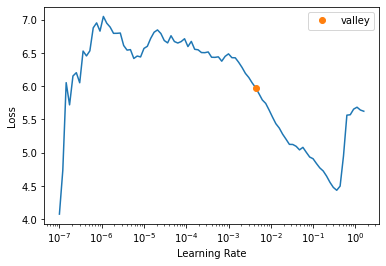

<Figure size 720x720 with 0 Axes>

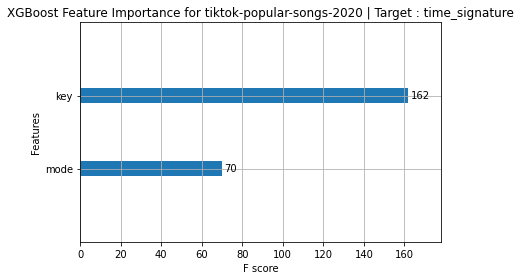

Target Variable: tempo
CATS=====================
['mode', 'key', 'time_signature']
CONTS=====================
['track_name', 'artist_name', 'artist_pop', 'album', 'track_pop', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'duration_ms', 'track_name_no_dollar']
18
Could not convert track_name to float.
Could not convert artist_name to float.
Could not convert album to float.
Could not convert track_name_no_dollar to float.
Looping through continuous variables to find breakpoint
Error with  track_name
Error with  artist_name
Error with  album
Error with  track_name_no_dollar
Continuous variables that made the cut : ['artist_pop', 'track_pop', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'duration_ms']
Categorical variables that made the cut : ['mode', 'key', 'time_signature']
Tabular Object size: 292


 14%|‚ñà‚ñç        | 6/42 [00:00<00:00, 56.41it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.00798371624516181, 'Adjusted R-Squared': -0.047128299518995886, 'RMSE': 24.276223058803797, 'Time taken': 0.028319358825683594}
{'Model': 'BaggingRegressor', 'R-Squared': -0.037489697256249954, 'Adjusted R-Squared': -0.09512801377048619, 'RMSE': 24.82639237864053, 'Time taken': 0.030955791473388672}
{'Model': 'BayesianRidge', 'R-Squared': -0.0016513123098147453, 'Adjusted R-Squared': -0.05729860743813786, 'RMSE': 24.393830450937354, 'Time taken': 0.011111736297607422}
{'Model': 'DecisionTreeRegressor', 'R-Squared': -0.019695220524469148, 'Adjusted R-Squared': -0.07634495499805083, 'RMSE': 24.61256695626, 'Time taken': 0.012694358825683594}
{'Model': 'DummyRegressor', 'R-Squared': -0.0016443491231621366, 'Adjusted R-Squared': -0.05729125740778218, 'RMSE': 24.393745, 'Time taken': 0.011040925979614258}
{'Model': 'ElasticNet', 'R-Squared': -0.003022723707281738, 'Adjusted R-Squared': -0.0587462083576864, 'RMSE': 24.41052415145329, 'Time taken'

 29%|‚ñà‚ñà‚ñä       | 12/42 [00:00<00:00, 32.32it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': -0.016416798608365646, 'Adjusted R-Squared': -0.07288439853105255, 'RMSE': 24.572969173181384, 'Time taken': 0.11095166206359863}
{'Model': 'GammaRegressor', 'R-Squared': -0.008596768204737204, 'Adjusted R-Squared': -0.06462992199388928, 'RMSE': 24.478257828314195, 'Time taken': 0.011009931564331055}
{'Model': 'GaussianProcessRegressor', 'R-Squared': -0.06418118303935505, 'Adjusted R-Squared': -0.12330235987487481, 'RMSE': 25.143718536649466, 'Time taken': 0.02459263801574707}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': -0.008624378679800149, 'Adjusted R-Squared': -0.06465906638423347, 'RMSE': 24.47859287385633, 'Time taken': 0.015254974365234375}
{'Model': 'GradientBoostingRegressor', 'R-Squared': -0.012157038831171585, 'Adjusted R-Squared': -0.06838798543290348, 'RMSE': 24.52142297268595, 'Time taken': 0.09496712684631348}


 38%|‚ñà‚ñà‚ñà‚ñä      | 16/42 [00:00<00:01, 24.12it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': -0.04215838417005835, 'Adjusted R-Squared': -0.10005607217950607, 'RMSE': 24.882188861038234, 'Time taken': 0.11734414100646973}
{'Model': 'HuberRegressor', 'R-Squared': -0.016200432393631337, 'Adjusted R-Squared': -0.07265601197105531, 'RMSE': 24.570353591016207, 'Time taken': 0.014751195907592773}
{'Model': 'KNeighborsRegressor', 'R-Squared': -0.1043379703824725, 'Adjusted R-Squared': -0.16569007984816553, 'RMSE': 25.613724, 'Time taken': 0.011657953262329102}
{'Model': 'KernelRidge', 'R-Squared': -24.486350571044554, 'Adjusted R-Squared': -25.902258936102584, 'RMSE': 123.04827934088522, 'Time taken': 0.012891769409179688}
{'Model': 'Lars', 'R-Squared': -0.019708186952806406, 'Adjusted R-Squared': -0.07635864178351781, 'RMSE': 24.612723442269097, 'Time taken': 0.012972831726074219}
{'Model': 'LarsCV', 'R-Squared': -0.001644352073139732, 'Adjusted R-Squared': -0.05729126052164757, 'RMSE': 24.393745697327883, 'Time taken': 0.01900

 50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 21/42 [00:00<00:00, 25.44it/s]

{'Model': 'LassoCV', 'R-Squared': -0.001644352073139732, 'Adjusted R-Squared': -0.05729126052164757, 'RMSE': 24.393745697327883, 'Time taken': 0.09539246559143066}
{'Model': 'LassoLars', 'R-Squared': -0.001644352073139732, 'Adjusted R-Squared': -0.05729126052164757, 'RMSE': 24.393745697327883, 'Time taken': 0.010303974151611328}
{'Model': 'LassoLarsCV', 'R-Squared': -0.001644352073139732, 'Adjusted R-Squared': -0.05729126052164757, 'RMSE': 24.393745697327883, 'Time taken': 0.016620159149169922}
{'Model': 'LassoLarsIC', 'R-Squared': -0.001644352073139732, 'Adjusted R-Squared': -0.05729126052164757, 'RMSE': 24.393745697327883, 'Time taken': 0.010559320449829102}
{'Model': 'LinearRegression', 'R-Squared': -0.019708186952806406, 'Adjusted R-Squared': -0.07635864178351781, 'RMSE': 24.6127234422691, 'Time taken': 0.00951242446899414}
{'Model': 'LinearSVR', 'R-Squared': -0.6061744647181064, 'Adjusted R-Squared': -0.6954063794246679, 'RMSE': 30.8900120217243, 'Time taken': 0.009735107421875}


 79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 33/42 [00:01<00:00, 18.17it/s]

{'Model': 'MLPRegressor', 'R-Squared': -12.940888873475878, 'Adjusted R-Squared': -13.715382699780093, 'RMSE': 91.00535569061148, 'Time taken': 0.6995184421539307}
{'Model': 'NuSVR', 'R-Squared': -0.03946462084328606, 'Adjusted R-Squared': -0.09721265533457979, 'RMSE': 24.850010404539525, 'Time taken': 0.020758867263793945}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.0077166329040099235, 'Adjusted R-Squared': -0.04741022082354518, 'RMSE': 24.2794908168632, 'Time taken': 0.013600587844848633}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.0077166329040099235, 'Adjusted R-Squared': -0.04741022082354518, 'RMSE': 24.2794908168632, 'Time taken': 0.020071983337402344}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.016848171470509876, 'Adjusted R-Squared': -0.037771374558906334, 'RMSE': 24.167515978291952, 'Time taken': 0.014197111129760742}
{'Model': 'PoissonRegressor', 'R-Squared': -0.019337790726216886, 'Adjusted R-Squared': -0.07596766798878463, 'RMSE': 24.60825

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 42/42 [00:01<00:00, 21.77it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': -0.029227577908361946, 'Adjusted R-Squared': -0.08640688779215977, 'RMSE': 24.727341457690578, 'Time taken': 0.14819860458374023}
{'Model': 'Ridge', 'R-Squared': -0.019591355425533585, 'Adjusted R-Squared': -0.07623531961584096, 'RMSE': 24.61131341905028, 'Time taken': 0.009523630142211914}
{'Model': 'RidgeCV', 'R-Squared': -0.01860143897976818, 'Adjusted R-Squared': -0.07519040781197761, 'RMSE': 24.59936301354537, 'Time taken': 0.00880289077758789}
{'Model': 'SGDRegressor', 'R-Squared': -0.01823043888737841, 'Adjusted R-Squared': -0.07479879660334388, 'RMSE': 24.594882754257746, 'Time taken': 0.011049509048461914}
{'Model': 'SVR', 'R-Squared': 0.010940173488936944, 'Adjusted R-Squared': -0.04400759465056647, 'RMSE': 24.24002145058712, 'Time taken': 0.011940479278564453}
{'Model': 'TransformedTargetRegressor', 'R-Squared': -0.019708186952806406, 'Adjusted R-Squared': -0.07635864178351781, 'RMSE': 24.6127234422691, 'Time taken': 0.00887989

LEARNING RATE: 0.1


Better model found at epoch 0 with _rmse value: 122.67948150634766.
Better model found at epoch 1 with _rmse value: 120.35369110107422.
Better model found at epoch 2 with _rmse value: 110.65100860595703.
Better model found at epoch 3 with _rmse value: 75.54042053222656.
Better model found at epoch 4 with _rmse value: 29.663331985473633.
No improvement since epoch 4: early stopping


<Figure size 432x288 with 0 Axes>

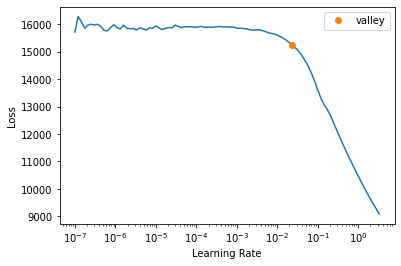

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
   actual  predicted
0   75.02     117.28
1  131.12     134.22
2  112.46     134.22
3  101.00     112.51
4  145.06     116.54
XGBoost RMSE:  24.612606


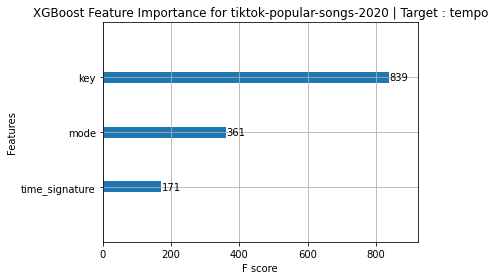

Target Variable: valence
CATS=====================
['mode', 'key', 'time_signature']
CONTS=====================
['track_name', 'artist_name', 'artist_pop', 'album', 'track_pop', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'tempo', 'duration_ms', 'track_name_no_dollar']
18
Could not convert track_name to float.
Could not convert artist_name to float.
Could not convert album to float.
Could not convert track_name_no_dollar to float.
Looping through continuous variables to find breakpoint
Error with  track_name
Error with  artist_name
Error with  album
Error with  track_name_no_dollar
Continuous variables that made the cut : ['artist_pop', 'track_pop', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'tempo', 'duration_ms']
Categorical variables that made the cut : ['mode', 'key', 'time_signature']
Tabular Object size: 292


 14%|‚ñà‚ñç        | 6/42 [00:00<00:00, 59.02it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': -0.05687714393502996, 'Adjusted R-Squared': -0.11559254082030934, 'RMSE': 0.25402767650846475, 'Time taken': 0.03678154945373535}
{'Model': 'BaggingRegressor', 'R-Squared': -0.1826204046136859, 'Adjusted R-Squared': -0.24832153820333525, 'RMSE': 0.26871472586753703, 'Time taken': 0.02838134765625}
{'Model': 'BayesianRidge', 'R-Squared': -0.03880943625314637, 'Adjusted R-Squared': -0.09652107160054335, 'RMSE': 0.2518469675406122, 'Time taken': 0.009818792343139648}
{'Model': 'DecisionTreeRegressor', 'R-Squared': -0.1871733926180872, 'Adjusted R-Squared': -0.25312746998575864, 'RMSE': 0.26923149339101615, 'Time taken': 0.009122371673583984}
{'Model': 'DummyRegressor', 'R-Squared': -0.007588408676840963, 'Adjusted R-Squared': -0.06356554249222102, 'RMSE': 0.24803351, 'Time taken': 0.008282661437988281}
{'Model': 'ElasticNet', 'R-Squared': -0.0075884191960449154, 'Adjusted R-Squared': -0.06356555359582527, 'RMSE': 0.24803351423721015, 'Time taken

 29%|‚ñà‚ñà‚ñä       | 12/42 [00:00<00:00, 31.57it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': -0.18717339261808674, 'Adjusted R-Squared': -0.2531274699857582, 'RMSE': 0.2692314933910161, 'Time taken': 0.11179590225219727}
{'Model': 'GammaRegressor', 'R-Squared': -0.02557251589064191, 'Adjusted R-Squared': -0.08254876677345546, 'RMSE': 0.2502372564127134, 'Time taken': 0.011116981506347656}
{'Model': 'GaussianProcessRegressor', 'R-Squared': -0.17811257901869526, 'Adjusted R-Squared': -0.2435632778530672, 'RMSE': 0.2682021033794591, 'Time taken': 0.026599884033203125}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': -0.02579788334682087, 'Adjusted R-Squared': -0.08278665464386648, 'RMSE': 0.25026474946425087, 'Time taken': 0.028309345245361328}
{'Model': 'GradientBoostingRegressor', 'R-Squared': -0.14857485243827018, 'Adjusted R-Squared': -0.2123845664626185, 'RMSE': 0.26481856911331775, 'Time taken': 0.09588837623596191}


 38%|‚ñà‚ñà‚ñà‚ñä      | 16/42 [00:00<00:01, 24.22it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': -0.13896120724177163, 'Adjusted R-Squared': -0.20223682986631464, 'RMSE': 0.26370796606941194, 'Time taken': 0.10788226127624512}
{'Model': 'HuberRegressor', 'R-Squared': -0.05484088371785001, 'Adjusted R-Squared': -0.11344315503550839, 'RMSE': 0.2537828439627544, 'Time taken': 0.01442265510559082}
{'Model': 'KNeighborsRegressor', 'R-Squared': -0.23950895565723562, 'Adjusted R-Squared': -0.30837056430485976, 'RMSE': 0.27510193, 'Time taken': 0.010808467864990234}
{'Model': 'KernelRidge', 'R-Squared': -4.526151403312932, 'Adjusted R-Squared': -4.833159814608095, 'RMSE': 0.5808716390293559, 'Time taken': 0.027290821075439453}
{'Model': 'Lars', 'R-Squared': -0.048879140951445965, 'Adjusted R-Squared': -0.10715020433763733, 'RMSE': 0.25306466366934405, 'Time taken': 0.025325775146484375}


 45%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 19/42 [00:00<00:00, 25.26it/s]

{'Model': 'LarsCV', 'R-Squared': -0.0045707028857677745, 'Adjusted R-Squared': -0.06038018637942155, 'RMSE': 0.2476618068806237, 'Time taken': 0.04801630973815918}
{'Model': 'Lasso', 'R-Squared': -0.0075884191960449154, 'Adjusted R-Squared': -0.06356555359582527, 'RMSE': 0.24803351423721015, 'Time taken': 0.01886153221130371}


 52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 22/42 [00:00<00:00, 25.67it/s]

{'Model': 'LassoCV', 'R-Squared': -0.005690075323301791, 'Adjusted R-Squared': -0.06156174617459631, 'RMSE': 0.2477997506888109, 'Time taken': 0.07831811904907227}
{'Model': 'LassoLars', 'R-Squared': -0.0075884191960449154, 'Adjusted R-Squared': -0.06356555359582527, 'RMSE': 0.24803351423721015, 'Time taken': 0.009800910949707031}
{'Model': 'LassoLarsCV', 'R-Squared': -0.0045707028857677745, 'Adjusted R-Squared': -0.06038018637942155, 'RMSE': 0.2476618068806237, 'Time taken': 0.01719975471496582}
{'Model': 'LassoLarsIC', 'R-Squared': -0.03849536421529964, 'Adjusted R-Squared': -0.09618955111614969, 'RMSE': 0.25180889315128585, 'Time taken': 0.010596036911010742}
{'Model': 'LinearRegression', 'R-Squared': -0.048879140951445965, 'Adjusted R-Squared': -0.10715020433763733, 'RMSE': 0.25306466366934405, 'Time taken': 0.00948953628540039}
{'Model': 'LinearSVR', 'R-Squared': -0.1017558988125371, 'Adjusted R-Squared': -0.1629645598576781, 'RMSE': 0.25936506288490024, 'Time taken': 0.0115485191

 71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 30/42 [00:01<00:00, 25.01it/s]

{'Model': 'MLPRegressor', 'R-Squared': -0.06064955343144485, 'Adjusted R-Squared': -0.11957452862208062, 'RMSE': 0.2544806349310305, 'Time taken': 0.1570444107055664}
{'Model': 'NuSVR', 'R-Squared': -0.09267436010051, 'Adjusted R-Squared': -0.15337849121720493, 'RMSE': 0.2582939055602441, 'Time taken': 0.032242774963378906}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': -0.005907255886298035, 'Adjusted R-Squared': -0.06179099232442575, 'RMSE': 0.24782650564320202, 'Time taken': 0.03414773941040039}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': -0.005907255886298035, 'Adjusted R-Squared': -0.06179099232442575, 'RMSE': 0.24782650564320202, 'Time taken': 0.044246673583984375}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -0.2699316608369564, 'Adjusted R-Squared': -0.340483419772343, 'RMSE': 0.2784575247654531, 'Time taken': 0.009411334991455078}
{'Model': 'PoissonRegressor', 'R-Squared': -0.020203516905902053, 'Adjusted R-Squared': -0.07688149006734113, 'RMSE': 0.24958

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 42/42 [00:01<00:00, 28.54it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': -0.15461976403909805, 'Adjusted R-Squared': -0.21876530648571468, 'RMSE': 0.26551452032440287, 'Time taken': 0.14819002151489258}
{'Model': 'Ridge', 'R-Squared': -0.04866242351131245, 'Adjusted R-Squared': -0.10692144703971862, 'RMSE': 0.2530385184457589, 'Time taken': 0.011440038681030273}
{'Model': 'RidgeCV', 'R-Squared': -0.046808418224812076, 'Adjusted R-Squared': -0.10496444145952388, 'RMSE': 0.2528147370466723, 'Time taken': 0.00902414321899414}
{'Model': 'SGDRegressor', 'R-Squared': -0.04286371734951566, 'Adjusted R-Squared': -0.10080059053559998, 'RMSE': 0.252337945025471, 'Time taken': 0.010381460189819336}
{'Model': 'SVR', 'R-Squared': -0.1343071862658547, 'Adjusted R-Squared': -0.19732425216951333, 'RMSE': 0.2631686330719233, 'Time taken': 0.012728214263916016}
{'Model': 'TransformedTargetRegressor', 'R-Squared': -0.048879140951445965, 'Adjusted R-Squared': -0.10715020433763733, 'RMSE': 0.25306466366934405, 'Time taken': 0.0093

LEARNING RATE: 0.1


Better model found at epoch 0 with _rmse value: 0.24879418313503265.
No improvement since epoch 0: early stopping


<Figure size 432x288 with 0 Axes>

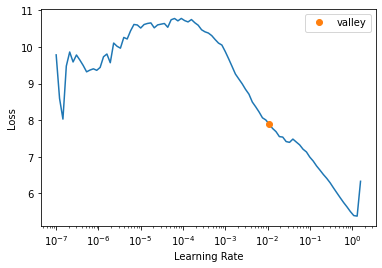

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
   actual  predicted
0    0.42       0.54
1    0.21       0.53
2    0.20       0.64
3    0.07       0.56
4    0.77       0.57
XGBoost RMSE:  0.26716143


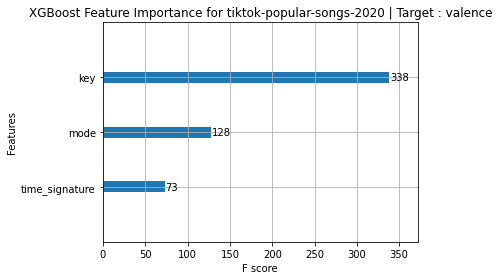

Target Variable: liveness
CATS=====================
['mode', 'key', 'time_signature']
CONTS=====================
['track_name', 'artist_name', 'artist_pop', 'album', 'track_pop', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'valence', 'tempo', 'duration_ms', 'track_name_no_dollar']
18
Could not convert track_name to float.
Could not convert artist_name to float.
Could not convert album to float.
Could not convert track_name_no_dollar to float.
Looping through continuous variables to find breakpoint
Error with  track_name
Error with  artist_name
Error with  album
Error with  track_name_no_dollar
Continuous variables that made the cut : ['artist_pop', 'track_pop', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'valence', 'tempo', 'duration_ms']
Categorical variables that made the cut : ['mode', 'key', 'time_signature']
Tabular Object size: 292


  0%|          | 0/42 [00:00<?, ?it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': -0.05978385339169434, 'Adjusted R-Squared': -0.11866073413567735, 'RMSE': 0.15813353603619054, 'Time taken': 0.020720243453979492}
{'Model': 'BaggingRegressor', 'R-Squared': -0.12151831075036368, 'Adjusted R-Squared': -0.1838248835698284, 'RMSE': 0.1626741392391251, 'Time taken': 0.027091026306152344}
{'Model': 'BayesianRidge', 'R-Squared': 0.0010460748555076727, 'Adjusted R-Squared': -0.05445136543029738, 'RMSE': 0.15352816598555194, 'Time taken': 0.009380817413330078}
{'Model': 'DecisionTreeRegressor', 'R-Squared': -0.15502571580740643, 'Adjusted R-Squared': -0.21919381113004022, 'RMSE': 0.16508634786186982, 'Time taken': 0.009005308151245117}
{'Model': 'DummyRegressor', 'R-Squared': -0.0011911953433278999, 'Adjusted R-Squared': -0.056812928417957265, 'RMSE': 0.1537, 'Time taken': 0.008345842361450195}
{'Model': 'ElasticNet', 'R-Squared': -0.0011912136949143726, 'Adjusted R-Squared': -0.05681294778907642, 'RMSE': 0.15369999308057153, 'Time 

 17%|‚ñà‚ñã        | 7/42 [00:00<00:00, 48.07it/s]

{'Model': 'ElasticNetCV', 'R-Squared': -0.0011912136949143726, 'Adjusted R-Squared': -0.05681294778907642, 'RMSE': 0.15369999308057153, 'Time taken': 0.06155109405517578}
{'Model': 'ExtraTreeRegressor', 'R-Squared': -0.12939850573899414, 'Adjusted R-Squared': -0.19214286716893825, 'RMSE': 0.1632446426451895, 'Time taken': 0.011858224868774414}


 29%|‚ñà‚ñà‚ñä       | 12/42 [00:00<00:00, 36.09it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': -0.12361359268134153, 'Adjusted R-Squared': -0.18603657005252727, 'RMSE': 0.16282602669920737, 'Time taken': 0.11235857009887695}
{'Model': 'GammaRegressor', 'R-Squared': 0.008310424712404507, 'Adjusted R-Squared': -0.046783440581350755, 'RMSE': 0.15296892233097448, 'Time taken': 0.01102757453918457}
{'Model': 'GaussianProcessRegressor', 'R-Squared': -0.16414798238764394, 'Adjusted R-Squared': -0.22882287029806858, 'RMSE': 0.16573698267361797, 'Time taken': 0.021519899368286133}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.007738374310602203, 'Adjusted R-Squared': -0.047387271561031064, 'RMSE': 0.1530130355897897, 'Time taken': 0.014241218566894531}
{'Model': 'GradientBoostingRegressor', 'R-Squared': -0.09091339835886392, 'Adjusted R-Squared': -0.15151969826768963, 'RMSE': 0.1604391937879716, 'Time taken': 0.09259438514709473}


 38%|‚ñà‚ñà‚ñà‚ñä      | 16/42 [00:00<00:01, 25.48it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': -0.0010249121131944428, 'Adjusted R-Squared': -0.05663740723059418, 'RMSE': 0.15368722748039257, 'Time taken': 0.11586523056030273}
{'Model': 'HuberRegressor', 'R-Squared': -0.030129620113428457, 'Adjusted R-Squared': -0.08735904345306333, 'RMSE': 0.15590544047913726, 'Time taken': 0.015230894088745117}
{'Model': 'KNeighborsRegressor', 'R-Squared': -0.08215725904585325, 'Adjusted R-Squared': -0.142277106770623, 'RMSE': 0.15979403, 'Time taken': 0.011153221130371094}
{'Model': 'KernelRidge', 'R-Squared': -1.5385312071004114, 'Adjusted R-Squared': -1.6795607186059898, 'RMSE': 0.24474091900321968, 'Time taken': 0.013383626937866211}
{'Model': 'Lars', 'R-Squared': 0.016068348619044492, 'Adjusted R-Squared': -0.03859452090211968, 'RMSE': 0.1523694145197506, 'Time taken': 0.018865346908569336}


 48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 20/42 [00:00<00:00, 28.32it/s]

{'Model': 'LarsCV', 'R-Squared': -0.0011912136949143726, 'Adjusted R-Squared': -0.05681294778907642, 'RMSE': 0.15369999308057153, 'Time taken': 0.04676103591918945}
{'Model': 'Lasso', 'R-Squared': -0.0011912136949143726, 'Adjusted R-Squared': -0.05681294778907642, 'RMSE': 0.15369999308057153, 'Time taken': 0.02730083465576172}


 57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 24/42 [00:00<00:00, 29.39it/s]

{'Model': 'LassoCV', 'R-Squared': -0.0011912136949143726, 'Adjusted R-Squared': -0.05681294778907642, 'RMSE': 0.15369999308057153, 'Time taken': 0.07957100868225098}
{'Model': 'LassoLars', 'R-Squared': -0.0011912136949143726, 'Adjusted R-Squared': -0.05681294778907642, 'RMSE': 0.15369999308057153, 'Time taken': 0.010421991348266602}
{'Model': 'LassoLarsCV', 'R-Squared': -0.0011912136949143726, 'Adjusted R-Squared': -0.05681294778907642, 'RMSE': 0.15369999308057153, 'Time taken': 0.017256498336791992}
{'Model': 'LassoLarsIC', 'R-Squared': -0.0011912136949143726, 'Adjusted R-Squared': -0.05681294778907642, 'RMSE': 0.15369999308057153, 'Time taken': 0.011033773422241211}
{'Model': 'LinearRegression', 'R-Squared': 0.016068348619044492, 'Adjusted R-Squared': -0.03859452090211968, 'RMSE': 0.1523694145197506, 'Time taken': 0.010568618774414062}
{'Model': 'LinearSVR', 'R-Squared': -0.1096029960586431, 'Adjusted R-Squared': -0.17124760695079, 'RMSE': 0.1618076846452799, 'Time taken': 0.01450419

 79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 33/42 [00:01<00:00, 29.82it/s]

{'Model': 'NuSVR', 'R-Squared': -0.0012886850175133358, 'Adjusted R-Squared': -0.056915834185153, 'RMSE': 0.1537074746569145, 'Time taken': 0.055939674377441406}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': -0.0024784070514274337, 'Adjusted R-Squared': -0.05817165188761786, 'RMSE': 0.15379876445349985, 'Time taken': 0.02972412109375}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.016068348619044492, 'Adjusted R-Squared': -0.03859452090211968, 'RMSE': 0.1523694145197506, 'Time taken': 0.015929460525512695}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -0.34784150263532143, 'Adjusted R-Squared': -0.4227215861150615, 'RMSE': 0.1783342442411118, 'Time taken': 0.011098623275756836}
{'Model': 'PoissonRegressor', 'R-Squared': 0.001607665016435722, 'Adjusted R-Squared': -0.05385857581598463, 'RMSE': 0.15348500482144883, 'Time taken': 0.010253667831420898}
{'Model': 'RANSACRegressor', 'R-Squared': -0.3436272239828315, 'Adjusted R-Squared': -0.4182731808707667, 'RMSE': 0.1

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 42/42 [00:01<00:00, 30.20it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': -0.12421565612961838, 'Adjusted R-Squared': -0.1866720814701528, 'RMSE': 0.16286964421649455, 'Time taken': 0.15258479118347168}
{'Model': 'Ridge', 'R-Squared': 0.016001474983094788, 'Adjusted R-Squared': -0.03866510974006654, 'RMSE': 0.15237459238124834, 'Time taken': 0.009139776229858398}
{'Model': 'RidgeCV', 'R-Squared': 0.015420271683763032, 'Adjusted R-Squared': -0.039278602111583405, 'RMSE': 0.15241958611866308, 'Time taken': 0.009389638900756836}
{'Model': 'SGDRegressor', 'R-Squared': 0.013390131888837642, 'Adjusted R-Squared': -0.04142152745067129, 'RMSE': 0.15257664486916234, 'Time taken': 0.009323596954345703}
{'Model': 'SVR', 'R-Squared': 0.008355745765131428, 'Adjusted R-Squared': -0.04673560169236124, 'RMSE': 0.15296542688644382, 'Time taken': 0.016347646713256836}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.016068348619044492, 'Adjusted R-Squared': -0.03859452090211968, 'RMSE': 0.1523694145197506, 'Time taken': 0.

LEARNING RATE: 0.1


Better model found at epoch 0 with _rmse value: 0.446613073348999.
Better model found at epoch 1 with _rmse value: 0.3201112747192383.
No improvement since epoch 1: early stopping


<Figure size 432x288 with 0 Axes>

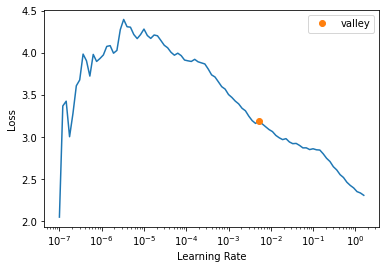

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
   actual  predicted
0    0.21       0.13
1    0.10       0.16
2    0.08       0.29
3    0.60       0.17
4    0.48       0.21
XGBoost RMSE:  0.16268583


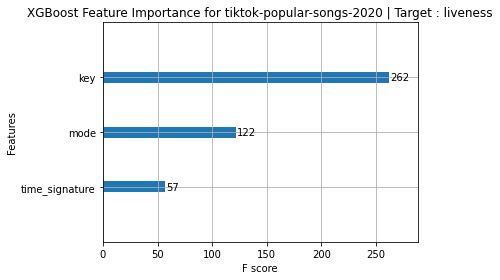

Target Variable: instrumentalness
CATS=====================
['mode', 'key', 'time_signature']
CONTS=====================
['track_name', 'artist_name', 'artist_pop', 'album', 'track_pop', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'liveness', 'valence', 'tempo', 'duration_ms', 'track_name_no_dollar']
18
Could not convert track_name to float.
Could not convert artist_name to float.
Could not convert album to float.
Could not convert track_name_no_dollar to float.
Looping through continuous variables to find breakpoint
Error with  track_name
Error with  artist_name
Error with  album
Error with  track_name_no_dollar
Continuous variables that made the cut : ['artist_pop', 'track_pop', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'liveness', 'valence', 'tempo', 'duration_ms']
Categorical variables that made the cut : ['mode', 'key', 'time_signature']
Tabular Object size: 292


  0%|          | 0/42 [00:00<?, ?it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': -0.20988330060802762, 'Adjusted R-Squared': -0.2770990395306958, 'RMSE': 0.15322017490845485, 'Time taken': 0.02013397216796875}
{'Model': 'BaggingRegressor', 'R-Squared': -0.5500534114886861, 'Adjusted R-Squared': -0.6361674899047243, 'RMSE': 0.17342733248819076, 'Time taken': 0.027562856674194336}
{'Model': 'BayesianRidge', 'R-Squared': -0.07829146549367128, 'Adjusted R-Squared': -0.1381965469099864, 'RMSE': 0.1446479544718291, 'Time taken': 0.009313821792602539}
{'Model': 'DecisionTreeRegressor', 'R-Squared': -0.27344042806011126, 'Adjusted R-Squared': -0.3441871185078953, 'RMSE': 0.15719311827489835, 'Time taken': 0.009033203125}
{'Model': 'DummyRegressor', 'R-Squared': -0.014429180743574577, 'Adjusted R-Squared': -0.07078635745155104, 'RMSE': 0.14029916, 'Time taken': 0.008346796035766602}
{'Model': 'ElasticNet', 'R-Squared': -0.014429263637486756, 'Adjusted R-Squared': -0.07078644495068054, 'RMSE': 0.14029916847173562, 'Time taken': 0.0

 17%|‚ñà‚ñã        | 7/42 [00:00<00:00, 48.95it/s]

{'Model': 'ElasticNetCV', 'R-Squared': -0.08305880731909832, 'Adjusted R-Squared': -0.14322874105904826, 'RMSE': 0.14496736056286544, 'Time taken': 0.058725595474243164}
{'Model': 'ExtraTreeRegressor', 'R-Squared': -0.27344042806011126, 'Adjusted R-Squared': -0.3441871185078953, 'RMSE': 0.15719311827489835, 'Time taken': 0.009974956512451172}


 29%|‚ñà‚ñà‚ñä       | 12/42 [00:00<00:00, 37.20it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': -0.27344042806011193, 'Adjusted R-Squared': -0.34418711850789596, 'RMSE': 0.1571931182748984, 'Time taken': 0.11056947708129883}
GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution
{'Model': 'GaussianProcessRegressor', 'R-Squared': -0.25447864893802263, 'Adjusted R-Squared': -0.3241719072123572, 'RMSE': 0.15601841070094835, 'Time taken': 0.02344369888305664}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': -0.04977029075233097, 'Adjusted R-Squared': -0.10809086246079391, 'RMSE': 0.14272214081315762, 'Time taken': 0.014343738555908203}
{'Model': 'GradientBoostingRegressor', 'R-Squared': -0.24265455557631066, 'Adjusted R-Squared': -0.31169091977499463, 'RMSE': 0.15528139383341344, 'Time taken': 0.06917381286621094}


 38%|‚ñà‚ñà‚ñà‚ñä      | 16/42 [00:00<00:00, 26.55it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': -0.27836557809409124, 'Adjusted R-Squared': -0.34938588798820747, 'RMSE': 0.157496804472708, 'Time taken': 0.1173255443572998}
{'Model': 'HuberRegressor', 'R-Squared': -0.09142920138352806, 'Adjusted R-Squared': -0.15206415701594622, 'RMSE': 0.14552647076242456, 'Time taken': 0.025168895721435547}
{'Model': 'KNeighborsRegressor', 'R-Squared': -0.8096634309450788, 'Adjusted R-Squared': -0.9102002882198055, 'RMSE': 0.18738858, 'Time taken': 0.011042118072509766}
{'Model': 'KernelRidge', 'R-Squared': -0.17034919278898797, 'Adjusted R-Squared': -0.23536859238837615, 'RMSE': 0.15069607555863956, 'Time taken': 0.014450788497924805}
{'Model': 'Lars', 'R-Squared': -0.09700811938233134, 'Adjusted R-Squared': -0.15795301490357194, 'RMSE': 0.14589793113442057, 'Time taken': 0.013435125350952148}


 48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 20/42 [00:00<00:00, 29.12it/s]

{'Model': 'LarsCV', 'R-Squared': -0.07547200766268358, 'Adjusted R-Squared': -0.13522045253283266, 'RMSE': 0.144458721893125, 'Time taken': 0.044156789779663086}
{'Model': 'Lasso', 'R-Squared': -0.014429263637486756, 'Adjusted R-Squared': -0.07078644495068054, 'RMSE': 0.14029916847173562, 'Time taken': 0.034212350845336914}


 57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 24/42 [00:00<00:00, 29.97it/s]

{'Model': 'LassoCV', 'R-Squared': -0.08410739945529833, 'Adjusted R-Squared': -0.14433558831392612, 'RMSE': 0.1450375205844361, 'Time taken': 0.07484054565429688}
{'Model': 'LassoLars', 'R-Squared': -0.014429263637486756, 'Adjusted R-Squared': -0.07078644495068054, 'RMSE': 0.14029916847173562, 'Time taken': 0.01017141342163086}
{'Model': 'LassoLarsCV', 'R-Squared': -0.07547200766268358, 'Adjusted R-Squared': -0.13522045253283266, 'RMSE': 0.144458721893125, 'Time taken': 0.017189979553222656}
{'Model': 'LassoLarsIC', 'R-Squared': -0.05851700678864069, 'Adjusted R-Squared': -0.11732350716578743, 'RMSE': 0.14331548990277, 'Time taken': 0.010496377944946289}
{'Model': 'LinearRegression', 'R-Squared': -0.09700811938233089, 'Adjusted R-Squared': -0.1579530149035715, 'RMSE': 0.14589793113442054, 'Time taken': 0.009561777114868164}
{'Model': 'LinearSVR', 'R-Squared': -0.09118686073595339, 'Adjusted R-Squared': -0.15180835299906192, 'RMSE': 0.14551031353619123, 'Time taken': 0.02051806449890136

 67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 28/42 [00:01<00:00, 18.40it/s]

{'Model': 'MLPRegressor', 'R-Squared': -0.20276779057023964, 'Adjusted R-Squared': -0.26958822337969734, 'RMSE': 0.15276895478253977, 'Time taken': 0.2532503604888916}
{'Model': 'NuSVR', 'R-Squared': -0.09134564104692533, 'Adjusted R-Squared': -0.15197595443842116, 'RMSE': 0.14552089986803055, 'Time taken': 0.1037743091583252}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': -0.03210333449616187, 'Adjusted R-Squared': -0.08944240863483754, 'RMSE': 0.1415160842501573, 'Time taken': 0.011501550674438477}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': -0.07975030770486602, 'Adjusted R-Squared': -0.13973643591069185, 'RMSE': 0.1447457699623202, 'Time taken': 0.013354778289794922}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -0.12890170593636952, 'Adjusted R-Squared': -0.19161846737727894, 'RMSE': 0.14800359933009563, 'Time taken': 0.009594440460205078}
{'Model': 'PoissonRegressor', 'R-Squared': -0.015912832921843423, 'Adjusted R-Squared': -0.07235243475083486, 'RMSE': 0.1

 81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 34/42 [00:01<00:00, 20.40it/s]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).
{'Model': 'RandomForestRegressor', 'R-Squared': -0.2951607974417203, 'Adjusted R-Squared': -0.36711417507737143, 'RMSE': 0.15852802819558637, 'Time taken': 0.14735126495361328}
{'Model': 'Ridge', 'R-Squared': -0.09655309613535978, 'Adjusted R-Squared': -0.15747271258732431, 'RMSE': 0.1458676698106003, 'Time taken': 0.009937524795532227}
{'Model': 'RidgeCV', 'R-Squared': -0.09266705286804311, 'Adjusted R-Squared': -0.15337077802737897, 'RMSE': 0.14560897227044914, 'Time taken': 0.00898289680480957}
{'Model': 'SGDRegressor', 'R-Squared': -0.09285623746640925, 'Adjusted R-Squared': -0.15357047288120973, 'RMSE': 0.14562157710858173, 'Time taken': 0.009148597717285156}
{'Model': 'SVR', 'R-Squared': -0.17095159974421215, 'Adjusted R-Squared': -0.23

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 42/42 [00:01<00:00, 27.40it/s]

{'Model': 'XGBRegressor', 'R-Squared': -0.2681701947098889, 'Adjusted R-Squared': -0.33862409441599395, 'RMSE': 0.1568675, 'Time taken': 0.027401447296142578}
{'Model': 'LGBMRegressor', 'R-Squared': -0.27836557809409124, 'Adjusted R-Squared': -0.34938588798820747, 'RMSE': 0.157496804472708, 'Time taken': 0.031025409698486328}
Project: tiktok-popular-songs-2020
tiktok-popular-songs-2020
Target: instrumentalness
instrumentalness
Target Standard Deviation: 0.10648360848426819
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
DummyRegressor                              -0.07      -0.01  0.14        0.01
LassoLars                                   -0.07      -0.01  0.14        0.01
Lasso                                       -0.07      -0.01  0.14        0.03
ElasticNet                                  -0.07      -0.01  0.14        0.01
PoissonRegressor                            -0.0

LEARNING RATE: 0.1


Better model found at epoch 0 with _rmse value: 0.4111928939819336.
Better model found at epoch 1 with _rmse value: 0.1815817505121231.
Better model found at epoch 2 with _rmse value: 0.18126915395259857.
No improvement since epoch 2: early stopping


<Figure size 432x288 with 0 Axes>

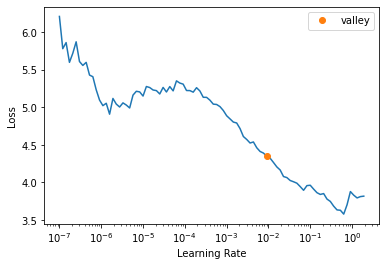

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
   actual  predicted
0    0.00       0.00
1    0.00       0.02
2    0.00       0.00
3    0.69       0.00
4    0.00       0.03
XGBoost RMSE:  0.1568675


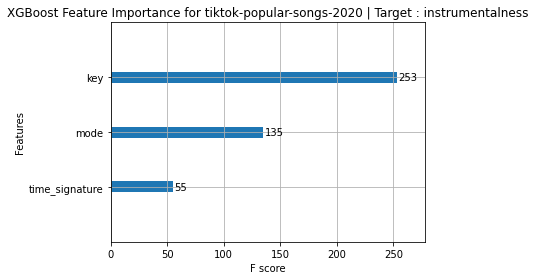

Target Variable: acousticness
CATS=====================
['mode', 'key', 'time_signature']
CONTS=====================
['track_name', 'artist_name', 'artist_pop', 'album', 'track_pop', 'danceability', 'energy', 'loudness', 'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'track_name_no_dollar']
18
Could not convert track_name to float.
Could not convert artist_name to float.
Could not convert album to float.
Could not convert track_name_no_dollar to float.
Looping through continuous variables to find breakpoint
Error with  track_name
Error with  artist_name
Error with  album
Error with  track_name_no_dollar
Continuous variables that made the cut : ['artist_pop', 'track_pop', 'danceability', 'energy', 'loudness', 'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
Categorical variables that made the cut : ['mode', 'key', 'time_signature']
Tabular Object size: 292


  0%|          | 0/42 [00:00<?, ?it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': -0.10458273690753672, 'Adjusted R-Squared': -0.1659484445135111, 'RMSE': 0.23056983359847438, 'Time taken': 0.024581193923950195}
{'Model': 'BaggingRegressor', 'R-Squared': -0.13092921717233774, 'Adjusted R-Squared': -0.19375861812635664, 'RMSE': 0.23330340239980502, 'Time taken': 0.026453256607055664}
{'Model': 'BayesianRidge', 'R-Squared': 0.08887977533587421, 'Adjusted R-Squared': 0.038261985076756044, 'RMSE': 0.20940700425792558, 'Time taken': 0.008985042572021484}
{'Model': 'DecisionTreeRegressor', 'R-Squared': -0.19376753517468148, 'Adjusted R-Squared': -0.2600879537954972, 'RMSE': 0.23969735534723216, 'Time taken': 0.008626461029052734}
{'Model': 'DummyRegressor', 'R-Squared': -0.04187830570925688, 'Adjusted R-Squared': -0.09976043380421573, 'RMSE': 0.22392978, 'Time taken': 0.008132457733154297}
{'Model': 'ElasticNet', 'R-Squared': -0.04187829319292802, 'Adjusted R-Squared': -0.09976042059253509, 'RMSE': 0.2239297809813333, 'Time take

 17%|‚ñà‚ñã        | 7/42 [00:00<00:00, 49.00it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.1085519750449806, 'Adjusted R-Squared': 0.059027084769701754, 'RMSE': 0.20713399138857852, 'Time taken': 0.0565342903137207}
{'Model': 'ExtraTreeRegressor', 'R-Squared': -0.19376753517468148, 'Adjusted R-Squared': -0.2600879537954972, 'RMSE': 0.23969735534723216, 'Time taken': 0.010162115097045898}


 29%|‚ñà‚ñà‚ñä       | 12/42 [00:00<00:00, 37.19it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': -0.19376753517468215, 'Adjusted R-Squared': -0.2600879537954979, 'RMSE': 0.23969735534723222, 'Time taken': 0.11246776580810547}
{'Model': 'GammaRegressor', 'R-Squared': 0.03960759927498669, 'Adjusted R-Squared': -0.01374753409862528, 'RMSE': 0.21499468214937037, 'Time taken': 0.01149606704711914}
{'Model': 'GaussianProcessRegressor', 'R-Squared': -0.0851714944273394, 'Adjusted R-Squared': -0.14545879967330277, 'RMSE': 0.2285349092129825, 'Time taken': 0.01688671112060547}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.04647860835195439, 'Adjusted R-Squared': -0.006494802295159197, 'RMSE': 0.21422422516159867, 'Time taken': 0.013842105865478516}
{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.09513324197217188, 'Adjusted R-Squared': 0.04486286652618143, 'RMSE': 0.20868713524782856, 'Time taken': 0.1101384162902832}


 38%|‚ñà‚ñà‚ñà‚ñä      | 16/42 [00:00<00:01, 24.11it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.034637467464429306, 'Adjusted R-Squared': -0.018993784343102504, 'RMSE': 0.2155502743253184, 'Time taken': 0.13027548789978027}
{'Model': 'HuberRegressor', 'R-Squared': 0.13117627486631656, 'Adjusted R-Squared': 0.08290829013666745, 'RMSE': 0.20448864456731158, 'Time taken': 0.01455545425415039}
{'Model': 'KNeighborsRegressor', 'R-Squared': -0.1320739971508451, 'Adjusted R-Squared': -0.1949669969925587, 'RMSE': 0.23342144, 'Time taken': 0.010569334030151367}
{'Model': 'KernelRidge', 'R-Squared': -0.6649658965297844, 'Adjusted R-Squared': -0.7574640018925503, 'RMSE': 0.2830779432598987, 'Time taken': 0.0251314640045166}


 48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 20/42 [00:00<00:00, 26.61it/s]

{'Model': 'Lars', 'R-Squared': 0.11610351499854721, 'Adjusted R-Squared': 0.06699815472068871, 'RMSE': 0.20625479975128166, 'Time taken': 0.03052234649658203}
{'Model': 'LarsCV', 'R-Squared': 0.10784339653360087, 'Adjusted R-Squared': 0.05827914078546759, 'RMSE': 0.20721629654666143, 'Time taken': 0.03284406661987305}
{'Model': 'Lasso', 'R-Squared': -0.04187829319292802, 'Adjusted R-Squared': -0.09976042059253509, 'RMSE': 0.2239297809813333, 'Time taken': 0.025922298431396484}


 55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 23/42 [00:00<00:00, 26.45it/s]

{'Model': 'LassoCV', 'R-Squared': 0.10895314798876532, 'Adjusted R-Squared': 0.059450545099252294, 'RMSE': 0.20708737851731718, 'Time taken': 0.07737469673156738}
{'Model': 'LassoLars', 'R-Squared': -0.04187829319292802, 'Adjusted R-Squared': -0.09976042059253509, 'RMSE': 0.2239297809813333, 'Time taken': 0.010140419006347656}
{'Model': 'LassoLarsCV', 'R-Squared': 0.10784339653360087, 'Adjusted R-Squared': 0.05827914078546759, 'RMSE': 0.20721629654666143, 'Time taken': 0.017408132553100586}
{'Model': 'LassoLarsIC', 'R-Squared': 0.0678453500864935, 'Adjusted R-Squared': 0.016058980646854182, 'RMSE': 0.21181043178108339, 'Time taken': 0.011156082153320312}
{'Model': 'LinearRegression', 'R-Squared': 0.11610351499854765, 'Adjusted R-Squared': 0.06699815472068915, 'RMSE': 0.20625479975128158, 'Time taken': 0.009674549102783203}
{'Model': 'LinearSVR', 'R-Squared': 0.03296537924694887, 'Adjusted R-Squared': -0.020758766350442936, 'RMSE': 0.2157368690645449, 'Time taken': 0.01756882667541504}


 64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 27/42 [00:01<00:00, 23.20it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.13011423287077406, 'Adjusted R-Squared': 0.08178724580803931, 'RMSE': 0.20461358889955117, 'Time taken': 0.17120957374572754}


 71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 30/42 [00:01<00:00, 23.88it/s]

{'Model': 'NuSVR', 'R-Squared': 0.1386149479845531, 'Adjusted R-Squared': 0.09076022287258378, 'RMSE': 0.2036113699067471, 'Time taken': 0.04575920104980469}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.10779017517004108, 'Adjusted R-Squared': 0.05822296267948779, 'RMSE': 0.20722247717086073, 'Time taken': 0.0353851318359375}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.10779017517004108, 'Adjusted R-Squared': 0.05822296267948779, 'RMSE': 0.20722247717086073, 'Time taken': 0.03086566925048828}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -1.3418983337547439, 'Adjusted R-Squared': -1.4720037967411188, 'RMSE': 0.33572785767557634, 'Time taken': 0.010935544967651367}
{'Model': 'PoissonRegressor', 'R-Squared': -0.0033919576792127426, 'Adjusted R-Squared': -0.05913595532805793, 'RMSE': 0.21975495095539319, 'Time taken': 0.010653018951416016}
{'Model': 'RANSACRegressor', 'R-Squared': -0.4221374371587452, 'Adjusted R-Squared': -0.5011450725564532, 'RMSE': 0.2616219

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 42/42 [00:01<00:00, 28.39it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': -0.13303548698675471, 'Adjusted R-Squared': -0.19598190293046325, 'RMSE': 0.23352055627675453, 'Time taken': 0.14991450309753418}
{'Model': 'Ridge', 'R-Squared': 0.11559084721770674, 'Adjusted R-Squared': 0.06645700539646815, 'RMSE': 0.20631460588477896, 'Time taken': 0.011772394180297852}
{'Model': 'RidgeCV', 'R-Squared': 0.11110844163879197, 'Adjusted R-Squared': 0.06172557728539152, 'RMSE': 0.20683677197526842, 'Time taken': 0.009839296340942383}
{'Model': 'SGDRegressor', 'R-Squared': 0.12326550490919497, 'Adjusted R-Squared': 0.07455803295970576, 'RMSE': 0.20541748489664532, 'Time taken': 0.0098114013671875}
{'Model': 'SVR', 'R-Squared': 0.15641698315715602, 'Adjusted R-Squared': 0.10955125999922022, 'RMSE': 0.20149639211712805, 'Time taken': 0.012313365936279297}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.11610351499854765, 'Adjusted R-Squared': 0.06699815472068915, 'RMSE': 0.20625479975128158, 'Time taken': 0.00930309295

LEARNING RATE: 0.1


Better model found at epoch 0 with _rmse value: 0.34227195382118225.
Better model found at epoch 1 with _rmse value: 0.31322547793388367.
Better model found at epoch 2 with _rmse value: 0.3054637312889099.
No improvement since epoch 2: early stopping


<Figure size 432x288 with 0 Axes>

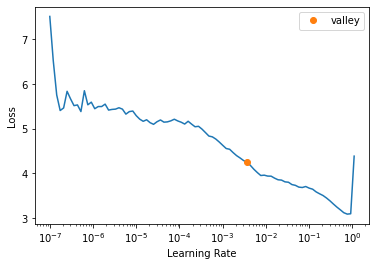

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
   actual  predicted
0    0.05       0.23
1    0.04       0.04
2    0.02       0.07
3    0.18       0.23
4    0.08       0.35
XGBoost RMSE:  0.23887011


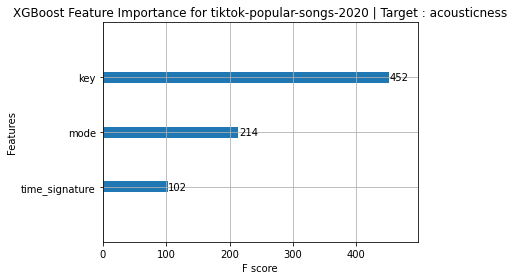

Target Variable: speechiness
CATS=====================
['mode', 'key', 'time_signature']
CONTS=====================
['track_name', 'artist_name', 'artist_pop', 'album', 'track_pop', 'danceability', 'energy', 'loudness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'track_name_no_dollar']
18
Could not convert track_name to float.
Could not convert artist_name to float.
Could not convert album to float.
Could not convert track_name_no_dollar to float.
Looping through continuous variables to find breakpoint
Error with  track_name
Error with  artist_name
Error with  album
Error with  track_name_no_dollar
Continuous variables that made the cut : ['artist_pop', 'track_pop', 'danceability', 'energy', 'loudness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
Categorical variables that made the cut : ['mode', 'key', 'time_signature']
Tabular Object size: 292


  0%|          | 0/42 [00:00<?, ?it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': -0.008736319958252414, 'Adjusted R-Squared': -0.06477722662259988, 'RMSE': 0.19332927215498816, 'Time taken': 0.02468395233154297}
{'Model': 'BaggingRegressor', 'R-Squared': -0.04616989371962177, 'Adjusted R-Squared': -0.10429044337071192, 'RMSE': 0.19688376049957435, 'Time taken': 0.027777671813964844}
{'Model': 'BayesianRidge', 'R-Squared': -0.007557231638620987, 'Adjusted R-Squared': -0.0635326333963222, 'RMSE': 0.19321625008315726, 'Time taken': 0.009408712387084961}
{'Model': 'DecisionTreeRegressor', 'R-Squared': -0.042163104121802464, 'Adjusted R-Squared': -0.1000610543507916, 'RMSE': 0.19650637027107432, 'Time taken': 0.008839130401611328}
{'Model': 'DummyRegressor', 'R-Squared': -0.006093809302119668, 'Adjusted R-Squared': -0.06198790981890423, 'RMSE': 0.19307588, 'Time taken': 0.008196592330932617}
{'Model': 'ElasticNet', 'R-Squared': -0.006093799924440146, 'Adjusted R-Squared': -0.06198789992024234, 'RMSE': 0.19307588012330143, 'Tim

 17%|‚ñà‚ñã        | 7/42 [00:00<00:00, 47.42it/s]

{'Model': 'ElasticNetCV', 'R-Squared': -0.006093799924440146, 'Adjusted R-Squared': -0.06198789992024234, 'RMSE': 0.19307588012330143, 'Time taken': 0.05912017822265625}
{'Model': 'ExtraTreeRegressor', 'R-Squared': -0.002449115534431945, 'Adjusted R-Squared': -0.058140733064122596, 'RMSE': 0.19272584362001163, 'Time taken': 0.010734319686889648}


 29%|‚ñà‚ñà‚ñä       | 12/42 [00:00<00:00, 33.37it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': -0.040541110057768615, 'Adjusted R-Squared': -0.09834894950542239, 'RMSE': 0.19635339216334574, 'Time taken': 0.11133360862731934}
{'Model': 'GammaRegressor', 'R-Squared': -0.011343482731143828, 'Adjusted R-Squared': -0.06752923177176307, 'RMSE': 0.19357894870951953, 'Time taken': 0.011801004409790039}
{'Model': 'GaussianProcessRegressor', 'R-Squared': -0.2923043470568445, 'Adjusted R-Squared': -0.3640990330044469, 'RMSE': 0.2188221039910404, 'Time taken': 0.029392480850219727}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': -0.01076045174081397, 'Adjusted R-Squared': -0.06691381017085929, 'RMSE': 0.1935231423495318, 'Time taken': 0.028533935546875}
{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.03193513589413477, 'Adjusted R-Squared': -0.02184624544508007, 'RMSE': 0.1893917320089483, 'Time taken': 0.09604668617248535}


 38%|‚ñà‚ñà‚ñà‚ñä      | 16/42 [00:00<00:01, 24.43it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.01367549999297235, 'Adjusted R-Squared': -0.041120305562973636, 'RMSE': 0.19116954099087874, 'Time taken': 0.11358308792114258}
{'Model': 'HuberRegressor', 'R-Squared': -0.0702708458756176, 'Adjusted R-Squared': -0.12973033731315198, 'RMSE': 0.1991386848332558, 'Time taken': 0.014296770095825195}
{'Model': 'KNeighborsRegressor', 'R-Squared': -0.08428946573834639, 'Adjusted R-Squared': -0.14452776939047673, 'RMSE': 0.20043862, 'Time taken': 0.010378122329711914}
{'Model': 'KernelRidge', 'R-Squared': -0.7321330400687298, 'Adjusted R-Squared': -0.8283626534058814, 'RMSE': 0.2533374587636763, 'Time taken': 0.012809991836547852}
{'Model': 'Lars', 'R-Squared': -0.018623031697759584, 'Adjusted R-Squared': -0.07521320012541288, 'RMSE': 0.1942743804712368, 'Time taken': 0.012909412384033203}
{'Model': 'LarsCV', 'R-Squared': -0.006093799924440146, 'Adjusted R-Squared': -0.06198789992024234, 'RMSE': 0.19307588012330143, 'Time taken': 0.020

 50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 21/42 [00:00<00:00, 26.31it/s]

{'Model': 'LassoCV', 'R-Squared': -0.006093799924440146, 'Adjusted R-Squared': -0.06198789992024234, 'RMSE': 0.19307588012330143, 'Time taken': 0.10795474052429199}
{'Model': 'LassoLars', 'R-Squared': -0.006093799924440146, 'Adjusted R-Squared': -0.06198789992024234, 'RMSE': 0.19307588012330143, 'Time taken': 0.011661767959594727}
{'Model': 'LassoLarsCV', 'R-Squared': -0.006093799924440146, 'Adjusted R-Squared': -0.06198789992024234, 'RMSE': 0.19307588012330143, 'Time taken': 0.017504453659057617}
{'Model': 'LassoLarsIC', 'R-Squared': -0.006093799924440146, 'Adjusted R-Squared': -0.06198789992024234, 'RMSE': 0.19307588012330143, 'Time taken': 0.011015892028808594}
{'Model': 'LinearRegression', 'R-Squared': -0.018623031697759584, 'Adjusted R-Squared': -0.07521320012541288, 'RMSE': 0.1942743804712368, 'Time taken': 0.00970602035522461}
{'Model': 'LinearSVR', 'R-Squared': -0.1452259785021599, 'Adjusted R-Squared': -0.20884964397450223, 'RMSE': 0.2059939106346692, 'Time taken': 0.013795375

 71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 30/42 [00:01<00:00, 27.93it/s]

{'Model': 'NuSVR', 'R-Squared': -0.0052059706031393205, 'Adjusted R-Squared': -0.06105074674775812, 'RMSE': 0.19299067123848176, 'Time taken': 0.04021906852722168}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': -0.0055716344521759, 'Adjusted R-Squared': -0.06143672525507449, 'RMSE': 0.19302577016204397, 'Time taken': 0.01785135269165039}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': -0.0055716344521759, 'Adjusted R-Squared': -0.06143672525507449, 'RMSE': 0.19302577016204397, 'Time taken': 0.0376429557800293}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -0.07028100381914326, 'Adjusted R-Squared': -0.12974105958687354, 'RMSE': 0.19913962984391476, 'Time taken': 0.013765811920166016}
{'Model': 'PoissonRegressor', 'R-Squared': -0.0069181481687137225, 'Adjusted R-Squared': -0.0628580452891978, 'RMSE': 0.19315496279613276, 'Time taken': 0.011242389678955078}
{'Model': 'RANSACRegressor', 'R-Squared': -0.2933852136653625, 'Adjusted R-Squared': -0.3652399477578827, 'RMSE': 

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 42/42 [00:01<00:00, 30.20it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': -0.017215436277914442, 'Adjusted R-Squared': -0.07372740496002073, 'RMSE': 0.19414010397453826, 'Time taken': 0.14829516410827637}
{'Model': 'Ridge', 'R-Squared': -0.01854209479220925, 'Adjusted R-Squared': -0.07512776672510979, 'RMSE': 0.19426666207146984, 'Time taken': 0.009899616241455078}
{'Model': 'RidgeCV', 'R-Squared': -0.017853421498200017, 'Adjusted R-Squared': -0.0744008338036557, 'RMSE': 0.1942009755942712, 'Time taken': 0.009648561477661133}
{'Model': 'SGDRegressor', 'R-Squared': -0.024588406490174686, 'Adjusted R-Squared': -0.08150998462851766, 'RMSE': 0.1948424157785202, 'Time taken': 0.00963902473449707}
{'Model': 'SVR', 'R-Squared': 0.011122359582328545, 'Adjusted R-Squared': -0.04381528710754212, 'RMSE': 0.19141680608119255, 'Time taken': 0.01306915283203125}
{'Model': 'TransformedTargetRegressor', 'R-Squared': -0.018623031697759584, 'Adjusted R-Squared': -0.07521320012541288, 'RMSE': 0.1942743804712368, 'Time taken': 0.0

LEARNING RATE: 0.1


Better model found at epoch 0 with _rmse value: 0.3169245421886444.
Better model found at epoch 1 with _rmse value: 0.22286677360534668.
No improvement since epoch 1: early stopping


<Figure size 432x288 with 0 Axes>

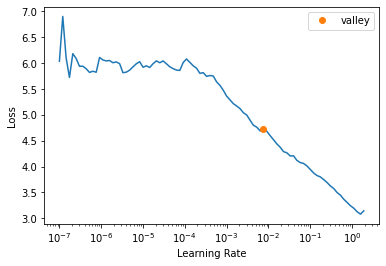

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
   actual  predicted
0    0.03       0.12
1    0.05       0.18
2    0.04       0.05
3    0.04      -0.01
4    0.34       0.20
XGBoost RMSE:  0.19226056


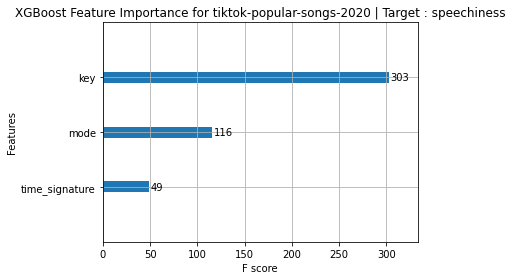

Target Variable: key
CATS=====================
['mode', 'key', 'time_signature']
CONTS=====================
['track_name', 'artist_name', 'artist_pop', 'album', 'track_pop', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'track_name_no_dollar']
19
Could not convert track_name to float.
Could not convert artist_name to float.
Could not convert album to float.
Could not convert track_name_no_dollar to float.
Looping through continuous variables to find breakpoint
Error with  track_name
Error with  artist_name
Error with  album
Error with  track_name_no_dollar
Continuous variables that made the cut : ['artist_pop', 'track_pop', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
Categorical variables that made the cut : ['mode', 'key', 'time_signature']
Tabular Object size: 292


  0%|          | 0/42 [00:00<?, ?it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': -0.0393198776060375, 'Adjusted R-Squared': -0.07711332770080248, 'RMSE': 3.6562007525574676, 'Time taken': 0.01803112030029297}
{'Model': 'BaggingRegressor', 'R-Squared': 0.010054023615782892, 'Adjusted R-Squared': -0.025944011889097673, 'RMSE': 3.5682983928463865, 'Time taken': 0.02560257911682129}
{'Model': 'BayesianRidge', 'R-Squared': 0.01753421939435884, 'Adjusted R-Squared': -0.018191808991300906, 'RMSE': 3.5547915025231065, 'Time taken': 0.009205341339111328}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.004574918996679278, 'Adjusted R-Squared': -0.03162235667616886, 'RMSE': 3.5781595886531243, 'Time taken': 0.008652925491333008}
{'Model': 'DummyRegressor', 'R-Squared': -0.00020446545503238767, 'Adjusted R-Squared': -0.036575536926124474, 'RMSE': 3.58673930113424, 'Time taken': 0.008127689361572266}
{'Model': 'ElasticNet', 'R-Squared': 0.007442067992820989, 'Adjusted R-Squared': -0.028650947716531094, 'RMSE': 3.573002739118389, 'Ti

 17%|‚ñà‚ñã        | 7/42 [00:00<00:00, 50.96it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.01824123662014132, 'Adjusted R-Squared': -0.017459082048217223, 'RMSE': 3.55351219529252, 'Time taken': 0.05808901786804199}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.004574918996679278, 'Adjusted R-Squared': -0.03162235667616886, 'RMSE': 3.5781595886531243, 'Time taken': 0.00957942008972168}
{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.004574918996679278, 'Adjusted R-Squared': -0.03162235667616886, 'RMSE': 3.5781595886531243, 'Time taken': 0.10346388816833496}
{'Model': 'GammaRegressor', 'R-Squared': 0.015884310226039977, 'Adjusted R-Squared': -0.0199017148566496, 'RMSE': 3.55777512947632, 'Time taken': 0.010472297668457031}
{'Model': 'GaussianProcessRegressor', 'R-Squared': -0.07772485305114962, 'Adjusted R-Squared': -0.116914847707555, 'RMSE': 3.7231399900884496, 'Time taken': 0.015656709671020508}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.01584061786974489, 'Adjusted R-Squared': -0.019946996025900665, 'RMSE': 3.557854106

 31%|‚ñà‚ñà‚ñà       | 13/42 [00:00<00:00, 35.38it/s]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.0045763130909162175, 'Adjusted R-Squared': -0.03162091188759586, 'RMSE': 3.5781570830434593, 'Time taken': 0.05622601509094238}
{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.016792659787734254, 'Adjusted R-Squared': -0.01896033440180278, 'RMSE': 3.5561328177126534, 'Time taken': 0.0883638858795166}
{'Model': 'HuberRegressor', 'R-Squared': 0.013155636594344822, 'Adjusted R-Squared': -0.022729612984042635, 'RMSE': 3.5627040657842315, 'Time taken': 0.012704133987426758}


 40%|‚ñà‚ñà‚ñà‚ñà      | 17/42 [00:00<00:00, 33.98it/s]

{'Model': 'KNeighborsRegressor', 'R-Squared': -0.15667560321715834, 'Adjusted R-Squared': -0.19873653424323678, 'RMSE': 3.857102718273179, 'Time taken': 0.011170387268066406}
{'Model': 'KernelRidge', 'R-Squared': -2.9275359643441354, 'Adjusted R-Squared': -3.0703554539566493, 'RMSE': 7.10747764245119, 'Time taken': 0.01245570182800293}
{'Model': 'Lars', 'R-Squared': 0.015048108467960453, 'Adjusted R-Squared': -0.020768323951386503, 'RMSE': 3.5592863268641017, 'Time taken': 0.012904644012451172}
{'Model': 'LarsCV', 'R-Squared': 0.015485842686818185, 'Adjusted R-Squared': -0.020314672124570166, 'RMSE': 3.5584953265235906, 'Time taken': 0.01992201805114746}
{'Model': 'Lasso', 'R-Squared': -0.00020446545503238767, 'Adjusted R-Squared': -0.036575536926124474, 'RMSE': 3.58673930113424, 'Time taken': 0.01182103157043457}


 50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 21/42 [00:00<00:00, 30.89it/s]

{'Model': 'LassoCV', 'R-Squared': 0.018194670371446953, 'Adjusted R-Squared': -0.017507341615045968, 'RMSE': 3.553596468423903, 'Time taken': 0.10649490356445312}
{'Model': 'LassoLars', 'R-Squared': -0.00020446545503238767, 'Adjusted R-Squared': -0.036575536926124474, 'RMSE': 3.58673930113424, 'Time taken': 0.010334014892578125}
{'Model': 'LassoLarsCV', 'R-Squared': 0.015485842686818185, 'Adjusted R-Squared': -0.020314672124570166, 'RMSE': 3.5584953265235906, 'Time taken': 0.016279220581054688}
{'Model': 'LassoLarsIC', 'R-Squared': 0.017818462127888735, 'Adjusted R-Squared': -0.01789723015836997, 'RMSE': 3.5542772369032893, 'Time taken': 0.011517047882080078}
{'Model': 'LinearRegression', 'R-Squared': 0.015048108467960453, 'Adjusted R-Squared': -0.020768323951386503, 'RMSE': 3.5592863268641017, 'Time taken': 0.009754657745361328}
{'Model': 'LinearSVR', 'R-Squared': -0.013404674213450152, 'Adjusted R-Squared': -0.050255753275757487, 'RMSE': 3.610329736978456, 'Time taken': 0.00982570648

 64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 27/42 [00:01<00:00, 15.50it/s]

{'Model': 'MLPRegressor', 'R-Squared': -0.020859674053906208, 'Adjusted R-Squared': -0.05798184401950279, 'RMSE': 3.6235849005917875, 'Time taken': 0.6002788543701172}
{'Model': 'NuSVR', 'R-Squared': 0.01653197789629901, 'Adjusted R-Squared': -0.01923049563474466, 'RMSE': 3.556604212683587, 'Time taken': 0.019849300384521484}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.016792199208335634, 'Adjusted R-Squared': -0.018960811729543003, 'RMSE': 3.556133650640387, 'Time taken': 0.01434636116027832}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.016792199208335634, 'Adjusted R-Squared': -0.018960811729543003, 'RMSE': 3.556133650640387, 'Time taken': 0.01961660385131836}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -0.726216362317297, 'Adjusted R-Squared': -0.7889878664015624, 'RMSE': 4.711975583715324, 'Time taken': 0.01471257209777832}
{'Model': 'PoissonRegressor', 'R-Squared': 0.016981634427975845, 'Adjusted R-Squared': -0.018764487956461462, 'RMSE': 3.5557910529

 86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 36/42 [00:01<00:00, 16.96it/s]

{'Model': 'RANSACRegressor', 'R-Squared': -0.3229216030442972, 'Adjusted R-Squared': -0.3710278431549989, 'RMSE': 4.12498592656125, 'Time taken': 0.2362513542175293}
{'Model': 'RandomForestRegressor', 'R-Squared': 0.017360988353394502, 'Adjusted R-Squared': -0.01837133934284574, 'RMSE': 3.5551048839670454, 'Time taken': 0.13840651512145996}
{'Model': 'Ridge', 'R-Squared': 0.015124921193348406, 'Adjusted R-Squared': -0.020688718035984488, 'RMSE': 3.559147536423628, 'Time taken': 0.009274005889892578}
{'Model': 'RidgeCV', 'R-Squared': 0.015738117754963032, 'Adjusted R-Squared': -0.020053223417583865, 'RMSE': 3.5580393771802856, 'Time taken': 0.009182453155517578}
{'Model': 'SGDRegressor', 'R-Squared': 0.015236012952196898, 'Adjusted R-Squared': -0.020573586576814185, 'RMSE': 3.558946798726636, 'Time taken': 0.010663032531738281}
{'Model': 'SVR', 'R-Squared': 0.008379253352951865, 'Adjusted R-Squared': -0.027679682888758883, 'RMSE': 3.5713155042661846, 'Time taken': 0.013124465942382812}


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 42/42 [00:01<00:00, 22.12it/s]

{'Model': 'XGBRegressor', 'R-Squared': -0.0032333620042408473, 'Adjusted R-Squared': -0.03971457516803145, 'RMSE': 3.592166, 'Time taken': 0.058515071868896484}
{'Model': 'LGBMRegressor', 'R-Squared': 0.016792659787734254, 'Adjusted R-Squared': -0.01896033440180278, 'RMSE': 3.5561328177126534, 'Time taken': 0.022556543350219727}
Project: tiktok-popular-songs-2020
tiktok-popular-songs-2020
Target: key
key
Target Standard Deviation: 3.7068800755899898
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
ElasticNetCV                                -0.02       0.02  3.55        0.06
LassoCV                                     -0.02       0.02  3.55        0.11
LassoLarsIC                                 -0.02       0.02  3.55        0.01
BayesianRidge                               -0.02       0.02  3.55        0.01
RandomForestRegressor                       -0.02       0.02  3.56      

LEARNING RATE: 0.1


Better model found at epoch 0 with _rmse value: 6.674882888793945.
Better model found at epoch 1 with _rmse value: 5.064171314239502.
Better model found at epoch 2 with _rmse value: 3.888200044631958.
No improvement since epoch 2: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0      11       5.39
1       7       6.80
2       6       8.45
3       8       5.39
4      12       6.80
XGBoost RMSE:  3.592166


<Figure size 432x288 with 0 Axes>

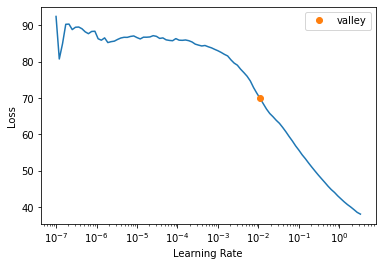

<Figure size 720x720 with 0 Axes>

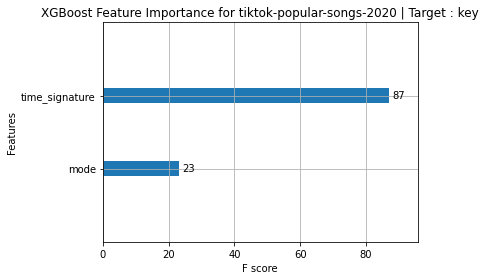

Target Variable: mode
CATS=====================
['mode', 'key', 'time_signature']
CONTS=====================
['track_name', 'artist_name', 'artist_pop', 'album', 'track_pop', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'track_name_no_dollar']
19
Could not convert track_name to float.
Could not convert artist_name to float.
Could not convert album to float.
Could not convert track_name_no_dollar to float.
Looping through continuous variables to find breakpoint
Error with  track_name
Error with  artist_name
Error with  album
Error with  track_name_no_dollar
Continuous variables that made the cut : ['artist_pop', 'track_pop', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
Categorical variables that made the cut : ['mode', 'key', 'time_signature']
Tabular Object size: 292


  0%|          | 0/42 [00:00<?, ?it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': -0.0038339232494939424, 'Adjusted R-Squared': -0.040336975004021, 'RMSE': 0.49345552940871884, 'Time taken': 0.01123189926147461}
{'Model': 'BaggingRegressor', 'R-Squared': -0.0005091877879939144, 'Adjusted R-Squared': -0.03689134007119366, 'RMSE': 0.4926376800846445, 'Time taken': 0.026311874389648438}
{'Model': 'BayesianRidge', 'R-Squared': -0.026335436457575634, 'Adjusted R-Squared': -0.06365672505603293, 'RMSE': 0.4989554237681599, 'Time taken': 0.009145021438598633}
{'Model': 'DecisionTreeRegressor', 'R-Squared': -0.020991135923790427, 'Adjusted R-Squared': -0.05811808632101911, 'RMSE': 0.49765465599461567, 'Time taken': 0.008807897567749023}
{'Model': 'DummyRegressor', 'R-Squared': -0.017331792092978526, 'Adjusted R-Squared': -0.054325675441814214, 'RMSE': 0.496762031118722, 'Time taken': 0.008324146270751953}
{'Model': 'ElasticNet', 'R-Squared': -0.017331792092978526, 'Adjusted R-Squared': -0.054325675441814214, 'RMSE': 0.4967620311187

 17%|‚ñà‚ñã        | 7/42 [00:00<00:00, 52.94it/s]

{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.03231768760562126, 'Adjusted R-Squared': -0.0028707601178106223, 'RMSE': 0.4844885160149419, 'Time taken': 0.010637283325195312}
{'Model': 'ExtraTreesRegressor', 'R-Squared': -0.031059721679099983, 'Adjusted R-Squared': -0.0685528024674309, 'RMSE': 0.5001024665785271, 'Time taken': 0.1271498203277588}
{'Model': 'GammaRegressor', 'R-Squared': -0.02055835427305941, 'Adjusted R-Squared': -0.05766956715571614, 'RMSE': 0.4975491709299779, 'Time taken': 0.010524272918701172}
{'Model': 'GaussianProcessRegressor', 'R-Squared': -0.0020347386276255985, 'Adjusted R-Squared': -0.03847236548681199, 'RMSE': 0.49301311769689016, 'Time taken': 0.021857500076293945}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': -0.01957745809434308, 'Adjusted R-Squared': -0.05665300202504642, 'RMSE': 0.4973100070428202, 'Time taken': 0.03084874153137207}


 31%|‚ñà‚ñà‚ñà       | 13/42 [00:00<00:01, 27.59it/s]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.024588146024517865, 'Adjusted R-Squared': -0.010881375938226912, 'RMSE': 0.4864196382344822, 'Time taken': 0.09593009948730469}


 40%|‚ñà‚ñà‚ñà‚ñà      | 17/42 [00:00<00:00, 26.75it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.04827833623440958, 'Adjusted R-Squared': 0.013670275733842607, 'RMSE': 0.4804764027635289, 'Time taken': 0.11107850074768066}
{'Model': 'HuberRegressor', 'R-Squared': -0.05586568581737028, 'Adjusted R-Squared': -0.09426080166527462, 'RMSE': 0.5060826211101375, 'Time taken': 0.014002799987792969}
{'Model': 'KNeighborsRegressor', 'R-Squared': -0.17137254901960808, 'Adjusted R-Squared': -0.21396791443850294, 'RMSE': 0.5330458995569545, 'Time taken': 0.010133504867553711}
{'Model': 'KernelRidge', 'R-Squared': -10.132179592008207, 'Adjusted R-Squared': -10.536986122626686, 'RMSE': 1.6432634205042325, 'Time taken': 0.02176189422607422}
{'Model': 'Lars', 'R-Squared': -0.04165647773439374, 'Adjusted R-Squared': -0.07953489510655354, 'RMSE': 0.5026658083975925, 'Time taken': 0.0171506404876709}


 48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 20/42 [00:00<00:00, 26.94it/s]

{'Model': 'LarsCV', 'R-Squared': -0.04165647773439374, 'Adjusted R-Squared': -0.07953489510655354, 'RMSE': 0.5026658083975925, 'Time taken': 0.04312849044799805}
{'Model': 'Lasso', 'R-Squared': -0.017331792092978526, 'Adjusted R-Squared': -0.054325675441814214, 'RMSE': 0.496762031118722, 'Time taken': 0.037674665451049805}


 55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 23/42 [00:00<00:00, 27.72it/s]

{'Model': 'LassoCV', 'R-Squared': -0.03551501840280635, 'Adjusted R-Squared': -0.07317010998109019, 'RMSE': 0.5011817945082, 'Time taken': 0.06522655487060547}
{'Model': 'LassoLars', 'R-Squared': -0.017331792092978526, 'Adjusted R-Squared': -0.054325675441814214, 'RMSE': 0.496762031118722, 'Time taken': 0.009677410125732422}
{'Model': 'LassoLarsCV', 'R-Squared': -0.04165647773439374, 'Adjusted R-Squared': -0.07953489510655354, 'RMSE': 0.5026658083975925, 'Time taken': 0.016136646270751953}
{'Model': 'LassoLarsIC', 'R-Squared': -0.04165647773439374, 'Adjusted R-Squared': -0.07953489510655354, 'RMSE': 0.5026658083975925, 'Time taken': 0.010539054870605469}
{'Model': 'LinearRegression', 'R-Squared': -0.04165647773439396, 'Adjusted R-Squared': -0.07953489510655376, 'RMSE': 0.5026658083975926, 'Time taken': 0.009324312210083008}
{'Model': 'LinearSVR', 'R-Squared': -0.20157793356277254, 'Adjusted R-Squared': -0.2452716766014189, 'RMSE': 0.5398748021144826, 'Time taken': 0.010151147842407227}

 79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 33/42 [00:01<00:00, 17.58it/s]

{'Model': 'MLPRegressor', 'R-Squared': -0.5325798673619919, 'Adjusted R-Squared': -0.5883100443569735, 'RMSE': 0.6097174770607686, 'Time taken': 0.6280701160430908}
{'Model': 'NuSVR', 'R-Squared': -0.03052102883430341, 'Adjusted R-Squared': -0.06799452079191437, 'RMSE': 0.4999718064372252, 'Time taken': 0.023253440856933594}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.046471162291767176, 'Adjusted R-Squared': 0.01179738637510419, 'RMSE': 0.4809323620343484, 'Time taken': 0.013814449310302734}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': -0.04165647773439374, 'Adjusted R-Squared': -0.07953489510655354, 'RMSE': 0.5026658083975925, 'Time taken': 0.019613981246948242}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -6.50720583858146, 'Adjusted R-Squared': -6.780195141802604, 'RMSE': 1.3494482913132322, 'Time taken': 0.0136566162109375}
{'Model': 'PoissonRegressor', 'R-Squared': -0.02616365535571541, 'Adjusted R-Squared': -0.06347869736865053, 'RMSE': 0.4989136661243

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 42/42 [00:01<00:00, 22.41it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.0004885696233313253, 'Adjusted R-Squared': -0.03585730057218384, 'RMSE': 0.49239197744203267, 'Time taken': 0.14485669136047363}
{'Model': 'Ridge', 'R-Squared': -0.04139947714023129, 'Adjusted R-Squared': -0.0792685490362397, 'RMSE': 0.5026037949682995, 'Time taken': 0.009972572326660156}
{'Model': 'RidgeCV', 'R-Squared': -0.03922525595054327, 'Adjusted R-Squared': -0.07701526525783575, 'RMSE': 0.502078855783022, 'Time taken': 0.008867979049682617}
{'Model': 'SGDRegressor', 'R-Squared': -0.050473290985271424, 'Adjusted R-Squared': -0.08867231974837231, 'RMSE': 0.5047886636599187, 'Time taken': 0.01013493537902832}
{'Model': 'SVR', 'R-Squared': -0.009752520513834684, 'Adjusted R-Squared': -0.046470793987064996, 'RMSE': 0.49490809651992734, 'Time taken': 0.012115955352783203}
{'Model': 'TransformedTargetRegressor', 'R-Squared': -0.04165647773439396, 'Adjusted R-Squared': -0.07953489510655376, 'RMSE': 0.5026658083975926, 'Time taken': 0.00

LEARNING RATE: 0.1


Better model found at epoch 0 with _rmse value: 1.165834903717041.
Better model found at epoch 1 with _rmse value: 0.6850759983062744.
No improvement since epoch 1: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       1       1.68
1       2       1.50
2       1       1.29
3       2       1.52
4       2       1.50
XGBoost RMSE:  0.49474317


<Figure size 432x288 with 0 Axes>

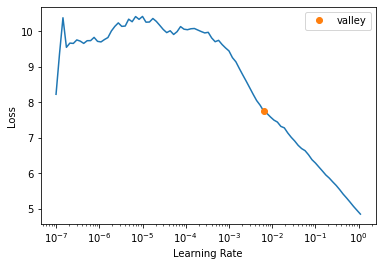

<Figure size 720x720 with 0 Axes>

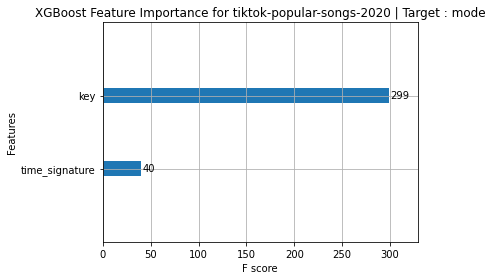

Target Variable: loudness
CATS=====================
['mode', 'key', 'time_signature']
CONTS=====================
['track_name', 'artist_name', 'artist_pop', 'album', 'track_pop', 'danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'track_name_no_dollar']
18
Could not convert track_name to float.
Could not convert artist_name to float.
Could not convert album to float.
Could not convert track_name_no_dollar to float.
Looping through continuous variables to find breakpoint
Error with  track_name
Error with  artist_name
Error with  album
Error with  track_name_no_dollar
Continuous variables that made the cut : ['artist_pop', 'track_pop', 'danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
Categorical variables that made the cut : ['mode', 'key', 'time_signature']
Tabular Object size: 292


  0%|          | 0/42 [00:00<?, ?it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': -0.1321139141889245, 'Adjusted R-Squared': -0.19500913164386469, 'RMSE': 2.7938408111062234, 'Time taken': 0.03336381912231445}
{'Model': 'BaggingRegressor', 'R-Squared': -0.025760565757905418, 'Adjusted R-Squared': -0.08274726385556685, 'RMSE': 2.659375065834522, 'Time taken': 0.027721643447875977}
{'Model': 'BayesianRidge', 'R-Squared': 0.04127915972832996, 'Adjusted R-Squared': -0.011983109175651707, 'RMSE': 2.5710035539139486, 'Time taken': 0.00959634780883789}
{'Model': 'DecisionTreeRegressor', 'R-Squared': -0.09933953019905006, 'Adjusted R-Squared': -0.1604139485434417, 'RMSE': 2.753103352762985, 'Time taken': 0.009229898452758789}
{'Model': 'DummyRegressor', 'R-Squared': -6.485615684304058e-05, 'Adjusted R-Squared': -0.055624014832223345, 'RMSE': 2.6258545, 'Time taken': 0.008411407470703125}
{'Model': 'ElasticNet', 'R-Squared': -6.481646011158304e-05, 'Adjusted R-Squared': -0.05562397293011778, 'RMSE': 2.6258545562720554, 'Time taken'

 17%|‚ñà‚ñã        | 7/42 [00:00<00:00, 44.81it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.045316018222448684, 'Adjusted R-Squared': -0.007721980765193148, 'RMSE': 2.565585018316001, 'Time taken': 0.05797290802001953}
{'Model': 'ExtraTreeRegressor', 'R-Squared': -0.15870476594512417, 'Adjusted R-Squared': -0.22307725294207548, 'RMSE': 2.826460949618274, 'Time taken': 0.010806798934936523}


 29%|‚ñà‚ñà‚ñä       | 12/42 [00:00<00:00, 34.31it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': -0.1430659432617094, 'Adjusted R-Squared': -0.2065696067762488, 'RMSE': 2.8073220428388805, 'Time taken': 0.10922002792358398}
GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution
{'Model': 'GaussianProcessRegressor', 'R-Squared': -5.546891365317066, 'Adjusted R-Squared': -5.910607552279125, 'RMSE': 6.718528445755301, 'Time taken': 0.02267932891845703}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.032476717155318524, 'Adjusted R-Squared': -0.021274576336052675, 'RMSE': 2.5827793497073954, 'Time taken': 0.02809309959411621}
{'Model': 'GradientBoostingRegressor', 'R-Squared': -0.020508708222115146, 'Adjusted R-Squared': -0.07720363645667705, 'RMSE': 2.6525583765611382, 'Time taken': 0.09833216667175293}


 38%|‚ñà‚ñà‚ñà‚ñä      | 16/42 [00:00<00:01, 24.45it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.015487949807076351, 'Adjusted R-Squared': -0.039207164092530444, 'RMSE': 2.605356220053287, 'Time taken': 0.11659550666809082}
{'Model': 'HuberRegressor', 'R-Squared': 0.008167794588152755, 'Adjusted R-Squared': -0.04693399460139425, 'RMSE': 2.6150241018539946, 'Time taken': 0.013900041580200195}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.013502536884965277, 'Adjusted R-Squared': -0.0413028777325366, 'RMSE': 2.607982, 'Time taken': 0.010558128356933594}
{'Model': 'KernelRidge', 'R-Squared': -6.952998025273441, 'Adjusted R-Squared': -7.394831248899743, 'RMSE': 7.404948292915684, 'Time taken': 0.02659440040588379}
{'Model': 'Lars', 'R-Squared': 0.04700277880523951, 'Adjusted R-Squared': -0.005941511261136068, 'RMSE': 2.5633175450206167, 'Time taken': 0.0209505558013916}


 45%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 19/42 [00:00<00:00, 25.59it/s]

{'Model': 'LarsCV', 'R-Squared': 0.04700277880523951, 'Adjusted R-Squared': -0.005941511261136068, 'RMSE': 2.5633175450206167, 'Time taken': 0.05295157432556152}
{'Model': 'Lasso', 'R-Squared': -6.481646011158304e-05, 'Adjusted R-Squared': -0.05562397293011778, 'RMSE': 2.6258545562720554, 'Time taken': 0.03658747673034668}


 52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 22/42 [00:00<00:00, 25.60it/s]

{'Model': 'LassoCV', 'R-Squared': 0.04698293847990953, 'Adjusted R-Squared': -0.005962453826762193, 'RMSE': 2.563344227569208, 'Time taken': 0.06717252731323242}
{'Model': 'LassoLars', 'R-Squared': -6.481646011158304e-05, 'Adjusted R-Squared': -0.05562397293011778, 'RMSE': 2.6258545562720554, 'Time taken': 0.010744094848632812}
{'Model': 'LassoLarsCV', 'R-Squared': 0.04700277880523951, 'Adjusted R-Squared': -0.005941511261136068, 'RMSE': 2.5633175450206167, 'Time taken': 0.018270254135131836}
{'Model': 'LassoLarsIC', 'R-Squared': 0.04700277880523951, 'Adjusted R-Squared': -0.005941511261136068, 'RMSE': 2.5633175450206167, 'Time taken': 0.010774850845336914}
{'Model': 'LinearRegression', 'R-Squared': 0.04700277880523951, 'Adjusted R-Squared': -0.005941511261136068, 'RMSE': 2.5633175450206167, 'Time taken': 0.009503602981567383}
{'Model': 'LinearSVR', 'R-Squared': -0.014469911531306945, 'Adjusted R-Squared': -0.070829351060824, 'RMSE': 2.6446985573578776, 'Time taken': 0.0099351406097412

 79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 33/42 [00:01<00:00, 18.61it/s]

{'Model': 'MLPRegressor', 'R-Squared': -0.015401379114562408, 'Adjusted R-Squared': -0.0718125668431493, 'RMSE': 2.6459124355277948, 'Time taken': 0.5990321636199951}
{'Model': 'NuSVR', 'R-Squared': -0.029643806118954785, 'Adjusted R-Squared': -0.08684623979223005, 'RMSE': 2.6644041328610757, 'Time taken': 0.021085023880004883}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.028713775242521167, 'Adjusted R-Squared': -0.02524657057733881, 'RMSE': 2.587797015642345, 'Time taken': 0.015260934829711914}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.04700277880523951, 'Adjusted R-Squared': -0.005941511261136068, 'RMSE': 2.5633175450206167, 'Time taken': 0.020935535430908203}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -0.5786202676844214, 'Adjusted R-Squared': -0.6663213936668893, 'RMSE': 3.299099623065611, 'Time taken': 0.01433563232421875}
PoissonRegressor model failed to execute
Some value(s) of y are out of the valid range for family PoissonDistribution
{'Model'

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 42/42 [00:01<00:00, 22.59it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.01589613696316894, 'Adjusted R-Squared': -0.03877629987221054, 'RMSE': 2.6048160625204377, 'Time taken': 0.1502394676208496}
{'Model': 'Ridge', 'R-Squared': 0.0469517128540331, 'Adjusted R-Squared': -0.005995414209631678, 'RMSE': 2.563386221241431, 'Time taken': 0.009943962097167969}
{'Model': 'RidgeCV', 'R-Squared': 0.04645964511659417, 'Adjusted R-Squared': -0.006514819043595077, 'RMSE': 2.5640478859777045, 'Time taken': 0.008971691131591797}
{'Model': 'SGDRegressor', 'R-Squared': 0.04664551139424411, 'Adjusted R-Squared': -0.006318626861631316, 'RMSE': 2.5637979787453378, 'Time taken': 0.012035608291625977}
{'Model': 'SVR', 'R-Squared': -0.0055915366823977575, 'Adjusted R-Squared': -0.061457733164753225, 'RMSE': 2.633100270902928, 'Time taken': 0.012231588363647461}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.04700277880523951, 'Adjusted R-Squared': -0.005941511261136068, 'RMSE': 2.5633175450206167, 'Time taken': 0.0095934

LEARNING RATE: 0.1


Better model found at epoch 0 with _rmse value: 7.173880577087402.
Better model found at epoch 1 with _rmse value: 5.450334072113037.
Better model found at epoch 2 with _rmse value: 3.3584952354431152.
Better model found at epoch 3 with _rmse value: 3.3241512775421143.
Better model found at epoch 4 with _rmse value: 3.2212021350860596.
Better model found at epoch 5 with _rmse value: 3.143376111984253.
No improvement since epoch 5: early stopping


<Figure size 432x288 with 0 Axes>

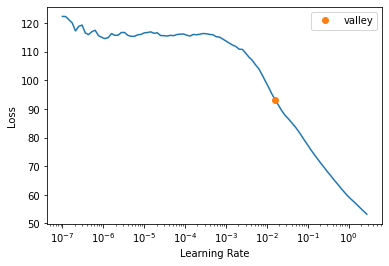

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
   actual  predicted
0   -8.44      -7.29
1  -10.23      -3.71
2   -7.56      -3.23
3   -6.15      -7.29
4   -7.58      -6.73
XGBoost RMSE:  2.8256764


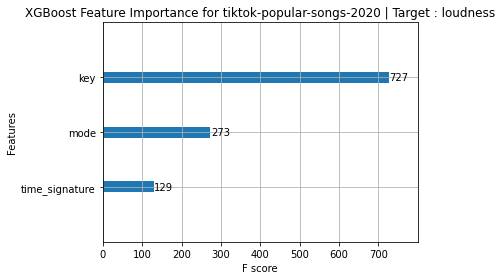

Target Variable: energy
CATS=====================
['mode', 'key', 'time_signature']
CONTS=====================
['track_name', 'artist_name', 'artist_pop', 'album', 'track_pop', 'danceability', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'track_name_no_dollar']
18
Could not convert track_name to float.
Could not convert artist_name to float.
Could not convert album to float.
Could not convert track_name_no_dollar to float.
Looping through continuous variables to find breakpoint
Error with  track_name
Error with  artist_name
Error with  album
Error with  track_name_no_dollar
Continuous variables that made the cut : ['artist_pop', 'track_pop', 'danceability', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
Categorical variables that made the cut : ['mode', 'key', 'time_signature']
Tabular Object size: 292


  0%|          | 0/42 [00:00<?, ?it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': -0.047519064559424784, 'Adjusted R-Squared': -0.10571456814605962, 'RMSE': 0.1619152948384987, 'Time taken': 0.02388596534729004}
{'Model': 'BaggingRegressor', 'R-Squared': -0.10140035043064044, 'Adjusted R-Squared': -0.16258925878789832, 'RMSE': 0.1660273026744799, 'Time taken': 0.027978897094726562}
{'Model': 'BayesianRidge', 'R-Squared': -0.017161945864156314, 'Adjusted R-Squared': -0.07367094285660958, 'RMSE': 0.1595518922168111, 'Time taken': 0.009389638900756836}
{'Model': 'DecisionTreeRegressor', 'R-Squared': -0.10621879176757498, 'Adjusted R-Squared': -0.16767539131021802, 'RMSE': 0.1663900771043768, 'Time taken': 0.00902104377746582}
{'Model': 'DummyRegressor', 'R-Squared': -0.01556562789765481, 'Adjusted R-Squared': -0.07198594055863561, 'RMSE': 0.15942664, 'Time taken': 0.008369684219360352}
{'Model': 'ElasticNet', 'R-Squared': -0.015565553315536773, 'Adjusted R-Squared': -0.07198586183306666, 'RMSE': 0.15942663808715793, 'Time tak

 17%|‚ñà‚ñã        | 7/42 [00:00<00:00, 47.93it/s]

{'Model': 'ElasticNetCV', 'R-Squared': -0.015565553315536773, 'Adjusted R-Squared': -0.07198586183306666, 'RMSE': 0.15942663808715793, 'Time taken': 0.057849884033203125}
{'Model': 'ExtraTreeRegressor', 'R-Squared': -0.10621879176757498, 'Adjusted R-Squared': -0.16767539131021802, 'RMSE': 0.1663900771043768, 'Time taken': 0.010533332824707031}


 29%|‚ñà‚ñà‚ñä       | 12/42 [00:00<00:00, 34.62it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': -0.10621879176757365, 'Adjusted R-Squared': -0.1676753913102167, 'RMSE': 0.1663900771043767, 'Time taken': 0.10942411422729492}
{'Model': 'GammaRegressor', 'R-Squared': -0.0172424408439793, 'Adjusted R-Squared': -0.07375590977975599, 'RMSE': 0.15955820530801348, 'Time taken': 0.010998964309692383}
{'Model': 'GaussianProcessRegressor', 'R-Squared': -0.1277045708258575, 'Adjusted R-Squared': -0.19035482476062748, 'RMSE': 0.16799818025108032, 'Time taken': 0.022894859313964844}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': -0.016834974166689998, 'Adjusted R-Squared': -0.0733258060648394, 'RMSE': 0.15952624578636326, 'Time taken': 0.02849292755126953}
{'Model': 'GradientBoostingRegressor', 'R-Squared': -0.11339979165583891, 'Adjusted R-Squared': -0.1752553356367188, 'RMSE': 0.1669292626253706, 'Time taken': 0.09765100479125977}


 38%|‚ñà‚ñà‚ñà‚ñä      | 16/42 [00:00<00:01, 24.32it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': -0.15605481457685944, 'Adjusted R-Squared': -0.2202800820533517, 'RMSE': 0.17009679103521444, 'Time taken': 0.12121796607971191}
{'Model': 'HuberRegressor', 'R-Squared': -0.020293586634710925, 'Adjusted R-Squared': -0.07697656366997263, 'RMSE': 0.15979731784229953, 'Time taken': 0.014422893524169922}
{'Model': 'KNeighborsRegressor', 'R-Squared': -0.09630994538377169, 'Adjusted R-Squared': -0.15721605346064793, 'RMSE': 0.16564319, 'Time taken': 0.010869026184082031}
{'Model': 'KernelRidge', 'R-Squared': -15.616498384134793, 'Adjusted R-Squared': -16.539637183253394, 'RMSE': 0.6448766646695848, 'Time taken': 0.025559186935424805}
{'Model': 'Lars', 'R-Squared': -0.021146164875213813, 'Adjusted R-Squared': -0.07787650736828122, 'RMSE': 0.15986406885817256, 'Time taken': 0.027213573455810547}


 45%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 19/42 [00:00<00:00, 24.85it/s]

{'Model': 'LarsCV', 'R-Squared': -0.015565553315536773, 'Adjusted R-Squared': -0.07198586183306666, 'RMSE': 0.15942663808715793, 'Time taken': 0.05041193962097168}
{'Model': 'Lasso', 'R-Squared': -0.015565553315536773, 'Adjusted R-Squared': -0.07198586183306666, 'RMSE': 0.15942663808715793, 'Time taken': 0.025696516036987305}


 52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 22/42 [00:00<00:00, 25.76it/s]

{'Model': 'LassoCV', 'R-Squared': -0.015565553315536773, 'Adjusted R-Squared': -0.07198586183306666, 'RMSE': 0.15942663808715793, 'Time taken': 0.06566476821899414}
{'Model': 'LassoLars', 'R-Squared': -0.015565553315536773, 'Adjusted R-Squared': -0.07198586183306666, 'RMSE': 0.15942663808715793, 'Time taken': 0.009760379791259766}
{'Model': 'LassoLarsCV', 'R-Squared': -0.015565553315536773, 'Adjusted R-Squared': -0.07198586183306666, 'RMSE': 0.15942663808715793, 'Time taken': 0.016742467880249023}
{'Model': 'LassoLarsIC', 'R-Squared': -0.011731670238043668, 'Adjusted R-Squared': -0.0679389852512684, 'RMSE': 0.1591254260976332, 'Time taken': 0.010572433471679688}
{'Model': 'LinearRegression', 'R-Squared': -0.021146164875213813, 'Adjusted R-Squared': -0.07787650736828122, 'RMSE': 0.15986406885817256, 'Time taken': 0.009166240692138672}
{'Model': 'LinearSVR', 'R-Squared': -0.011075102597609465, 'Adjusted R-Squared': -0.06724594163080999, 'RMSE': 0.15907378515159076, 'Time taken': 0.011933

 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 31/42 [00:01<00:00, 23.45it/s]

{'Model': 'MLPRegressor', 'R-Squared': -0.046751677661097, 'Adjusted R-Squared': -0.10490454864226906, 'RMSE': 0.1618559763762493, 'Time taken': 0.27480340003967285}
{'Model': 'NuSVR', 'R-Squared': -0.09828855029714134, 'Adjusted R-Squared': -0.15930458086920485, 'RMSE': 0.16579259727472562, 'Time taken': 0.04519820213317871}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': -0.008770803214800837, 'Adjusted R-Squared': -0.0648136256156231, 'RMSE': 0.15889241251585454, 'Time taken': 0.020601272583007812}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': -0.021146164875213813, 'Adjusted R-Squared': -0.07787650736828122, 'RMSE': 0.15986406885817256, 'Time taken': 0.020236492156982422}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -2.256910968189452, 'Adjusted R-Squared': -2.4378504664221996, 'RMSE': 0.28550245727149304, 'Time taken': 0.012349367141723633}
{'Model': 'PoissonRegressor', 'R-Squared': -0.01621386466732, 'Adjusted R-Squared': -0.07267019048217116, 'RMSE': 0.159477

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 42/42 [00:01<00:00, 27.01it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': -0.09531812854070898, 'Adjusted R-Squared': -0.15616913568185953, 'RMSE': 0.16556824486109212, 'Time taken': 0.14905118942260742}
{'Model': 'Ridge', 'R-Squared': -0.021097360187666725, 'Adjusted R-Squared': -0.07782499130920373, 'RMSE': 0.15986024853869976, 'Time taken': 0.010271072387695312}
{'Model': 'RidgeCV', 'R-Squared': -0.02068474331754211, 'Adjusted R-Squared': -0.07738945127962782, 'RMSE': 0.15982794618296794, 'Time taken': 0.008971691131591797}
{'Model': 'SGDRegressor', 'R-Squared': -0.03406061700886953, 'Adjusted R-Squared': -0.09150842906491796, 'RMSE': 0.16087179442624186, 'Time taken': 0.008814573287963867}
{'Model': 'SVR', 'R-Squared': -0.1182429287063087, 'Adjusted R-Squared': -0.1803675358566592, 'RMSE': 0.16729192841513546, 'Time taken': 0.011343240737915039}
{'Model': 'TransformedTargetRegressor', 'R-Squared': -0.021146164875213813, 'Adjusted R-Squared': -0.07787650736828122, 'RMSE': 0.15986406885817256, 'Time taken': 0

LEARNING RATE: 0.1


Better model found at epoch 0 with _rmse value: 0.3136538863182068.
Better model found at epoch 1 with _rmse value: 0.30046436190605164.
No improvement since epoch 1: early stopping


<Figure size 432x288 with 0 Axes>

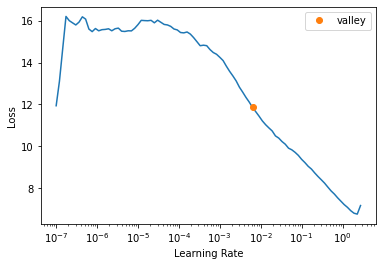

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
   actual  predicted
0    0.44       0.61
1    0.39       0.63
2    0.73       0.66
3    0.87       0.63
4    0.75       0.59
XGBoost RMSE:  0.1663725


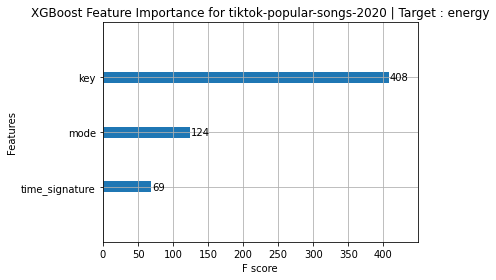

Target Variable: danceability
CATS=====================
['mode', 'key', 'time_signature']
CONTS=====================
['track_name', 'artist_name', 'artist_pop', 'album', 'track_pop', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'track_name_no_dollar']
18
Could not convert track_name to float.
Could not convert artist_name to float.
Could not convert album to float.
Could not convert track_name_no_dollar to float.
Looping through continuous variables to find breakpoint
Error with  track_name
Error with  artist_name
Error with  album
Error with  track_name_no_dollar
Continuous variables that made the cut : ['artist_pop', 'track_pop', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
Categorical variables that made the cut : ['mode', 'key', 'time_signature']
Tabular Object size: 292


  0%|          | 0/42 [00:00<?, ?it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': -0.03991505869710932, 'Adjusted R-Squared': -0.0976881175136155, 'RMSE': 0.15565192526516383, 'Time taken': 0.027426481246948242}
{'Model': 'BaggingRegressor', 'R-Squared': -0.059272153924617044, 'Adjusted R-Squared': -0.11812060692042903, 'RMSE': 0.15709390707583082, 'Time taken': 0.02646327018737793}
{'Model': 'BayesianRidge', 'R-Squared': -0.006295824789187554, 'Adjusted R-Squared': -0.062201148388586924, 'RMSE': 0.15311523268234925, 'Time taken': 0.00943899154663086}
{'Model': 'DecisionTreeRegressor', 'R-Squared': -0.0927286137248935, 'Adjusted R-Squared': -0.15343575893183203, 'RMSE': 0.15955547860912736, 'Time taken': 0.009235620498657227}
{'Model': 'DummyRegressor', 'R-Squared': -0.0011582123446314263, 'Adjusted R-Squared': -0.05677811303044433, 'RMSE': 0.15272388, 'Time taken': 0.00887918472290039}
{'Model': 'ElasticNet', 'R-Squared': -0.0011581826969422337, 'Adjusted R-Squared': -0.056778081735661345, 'RMSE': 0.15272386769897126, 'Ti

 17%|‚ñà‚ñã        | 7/42 [00:00<00:00, 46.31it/s]

{'Model': 'ElasticNetCV', 'R-Squared': -0.009634396022736746, 'Adjusted R-Squared': -0.06572519580177771, 'RMSE': 0.1533690163173846, 'Time taken': 0.05987048149108887}
{'Model': 'ExtraTreeRegressor', 'R-Squared': -0.0927286137248935, 'Adjusted R-Squared': -0.15343575893183203, 'RMSE': 0.15955547860912736, 'Time taken': 0.011645078659057617}


 29%|‚ñà‚ñà‚ñä       | 12/42 [00:00<00:00, 35.27it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': -0.0927286137248926, 'Adjusted R-Squared': -0.15343575893183115, 'RMSE': 0.15955547860912728, 'Time taken': 0.11135673522949219}
{'Model': 'GammaRegressor', 'R-Squared': 0.0053621628171152125, 'Adjusted R-Squared': -0.049895494804156115, 'RMSE': 0.15222572510437962, 'Time taken': 0.011338949203491211}
{'Model': 'GaussianProcessRegressor', 'R-Squared': -0.08431963331183501, 'Adjusted R-Squared': -0.14455961294027042, 'RMSE': 0.1589403715808452, 'Time taken': 0.024640321731567383}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.0010927758766701157, 'Adjusted R-Squared': -0.05440206990795926, 'RMSE': 0.15255208238324958, 'Time taken': 0.0144195556640625}
{'Model': 'GradientBoostingRegressor', 'R-Squared': -0.08889677690136732, 'Adjusted R-Squared': -0.14939104228477662, 'RMSE': 0.159275478855095, 'Time taken': 0.10941910743713379}


 38%|‚ñà‚ñà‚ñà‚ñä      | 16/42 [00:00<00:01, 24.34it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': -0.09552465662339338, 'Adjusted R-Squared': -0.15638713754691524, 'RMSE': 0.15975948120386413, 'Time taken': 0.11404824256896973}
{'Model': 'HuberRegressor', 'R-Squared': -0.0030171663023998985, 'Adjusted R-Squared': -0.05874034220808877, 'RMSE': 0.15286559330209143, 'Time taken': 0.015358924865722656}
{'Model': 'KNeighborsRegressor', 'R-Squared': -0.13437388272386275, 'Adjusted R-Squared': -0.19739465398629963, 'RMSE': 0.16256747, 'Time taken': 0.011034727096557617}
{'Model': 'KernelRidge', 'R-Squared': -21.967367578783595, 'Adjusted R-Squared': -23.243332444271573, 'RMSE': 0.7314946831697213, 'Time taken': 0.013717174530029297}
{'Model': 'Lars', 'R-Squared': -0.010303263278809371, 'Adjusted R-Squared': -0.06643122234985444, 'RMSE': 0.15341981021324452, 'Time taken': 0.013191699981689453}
{'Model': 'LarsCV', 'R-Squared': -0.009555390311741796, 'Adjusted R-Squared': -0.06564180088461646, 'RMSE': 0.15336301549902867, 'Time taken': 

 50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 21/42 [00:00<00:00, 25.11it/s]

{'Model': 'LassoCV', 'R-Squared': -0.009643701863392362, 'Adjusted R-Squared': -0.06573501863358078, 'RMSE': 0.1533697231199382, 'Time taken': 0.0944666862487793}
{'Model': 'LassoLars', 'R-Squared': -0.0011581826969422337, 'Adjusted R-Squared': -0.056778081735661345, 'RMSE': 0.15272386769897126, 'Time taken': 0.010586738586425781}
{'Model': 'LassoLarsCV', 'R-Squared': -0.009555390311741796, 'Adjusted R-Squared': -0.06564180088461646, 'RMSE': 0.15336301549902867, 'Time taken': 0.017606735229492188}
{'Model': 'LassoLarsIC', 'R-Squared': 0.0004708392662750027, 'Adjusted R-Squared': -0.05505855855226538, 'RMSE': 0.15259956575268066, 'Time taken': 0.01091909408569336}
{'Model': 'LinearRegression', 'R-Squared': -0.010303263278809371, 'Adjusted R-Squared': -0.06643122234985444, 'RMSE': 0.15341981021324452, 'Time taken': 0.009508848190307617}
{'Model': 'LinearSVR', 'R-Squared': -0.003609583528222604, 'Adjusted R-Squared': -0.05936567150201277, 'RMSE': 0.15291073053686952, 'Time taken': 0.01256

 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 31/42 [00:01<00:00, 24.79it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.0030423228595175544, 'Adjusted R-Squared': -0.05234421475939821, 'RMSE': 0.152403143273814, 'Time taken': 0.2641427516937256}
{'Model': 'NuSVR', 'R-Squared': -0.04254493447839547, 'Adjusted R-Squared': -0.1004640975049731, 'RMSE': 0.15584861765373098, 'Time taken': 0.046025753021240234}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.053117816037916654, 'Adjusted R-Squared': 0.0005132502622453572, 'RMSE': 0.14852635936268563, 'Time taken': 0.023158788681030273}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': -0.016464358588426986, 'Adjusted R-Squared': -0.07293460073222846, 'RMSE': 0.15388689639082506, 'Time taken': 0.01734304428100586}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -0.019098688270690944, 'Adjusted R-Squared': -0.0757152820635072, 'RMSE': 0.1540861785878824, 'Time taken': 0.012096643447875977}
{'Model': 'PoissonRegressor', 'R-Squared': 0.0016712877491661393, 'Adjusted R-Squared': -0.05379141848699143, 'RMSE': 0

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 42/42 [00:01<00:00, 27.32it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': -0.06820248484545877, 'Adjusted R-Squared': -0.12754706733687327, 'RMSE': 0.15775471748968314, 'Time taken': 0.1491100788116455}
{'Model': 'Ridge', 'R-Squared': -0.010146370190677434, 'Adjusted R-Squared': -0.06626561297904843, 'RMSE': 0.15340789723461318, 'Time taken': 0.011137247085571289}
{'Model': 'RidgeCV', 'R-Squared': -0.0088348502855351, 'Adjusted R-Squared': -0.06488123085695374, 'RMSE': 0.15330827659288546, 'Time taken': 0.008962154388427734}
{'Model': 'SGDRegressor', 'R-Squared': -0.0062406924206901415, 'Adjusted R-Squared': -0.06214295311072848, 'RMSE': 0.15311103822936162, 'Time taken': 0.009064197540283203}
{'Model': 'SVR', 'R-Squared': -0.05713282931794472, 'Adjusted R-Squared': -0.11586243094671955, 'RMSE': 0.15693519209547552, 'Time taken': 0.012295007705688477}
{'Model': 'TransformedTargetRegressor', 'R-Squared': -0.010303263278809371, 'Adjusted R-Squared': -0.06643122234985444, 'RMSE': 0.15341981021324452, 'Time taken':

LEARNING RATE: 0.1


Better model found at epoch 0 with _rmse value: 0.35449907183647156.
Better model found at epoch 1 with _rmse value: 0.158237025141716.
No improvement since epoch 1: early stopping


<Figure size 432x288 with 0 Axes>

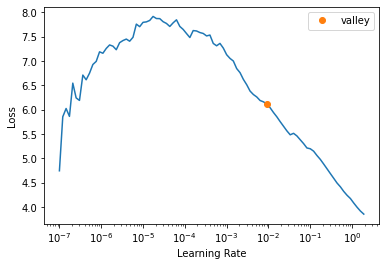

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
   actual  predicted
0    0.50       0.76
1    0.92       0.66
2    0.80       0.72
3    0.93       0.82
4    0.77       0.70
XGBoost RMSE:  0.15937798


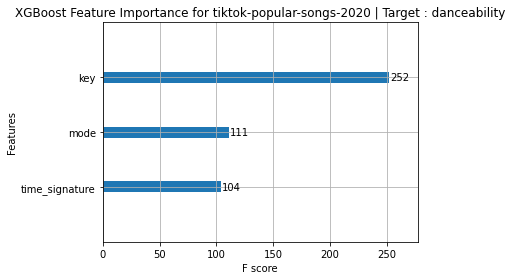

Target Variable: track_pop
CATS=====================
['mode', 'key', 'time_signature']
CONTS=====================
['track_name', 'artist_name', 'artist_pop', 'album', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'track_name_no_dollar']
18
Could not convert track_name to float.
Could not convert artist_name to float.
Could not convert album to float.
Could not convert track_name_no_dollar to float.
Looping through continuous variables to find breakpoint
Error with  track_name
Error with  artist_name
Error with  album
Error with  track_name_no_dollar
Continuous variables that made the cut : ['artist_pop', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
Categorical variables that made the cut : ['mode', 'key', 'time_signature']
Tabular Object size: 292


  0%|          | 0/42 [00:00<?, ?it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.06267232263258671, 'Adjusted R-Squared': 0.010598562778841525, 'RMSE': 20.266944129799967, 'Time taken': 0.020417213439941406}
{'Model': 'BaggingRegressor', 'R-Squared': -0.07746140063269547, 'Adjusted R-Squared': -0.1373203673345118, 'RMSE': 21.729183632604855, 'Time taken': 0.02748394012451172}
{'Model': 'BayesianRidge', 'R-Squared': -0.009616885952431709, 'Adjusted R-Squared': -0.06570671294978903, 'RMSE': 21.033950742108136, 'Time taken': 0.009675741195678711}
{'Model': 'DecisionTreeRegressor', 'R-Squared': -0.06877415028748524, 'Adjusted R-Squared': -0.1281504919701233, 'RMSE': 21.641408380371484, 'Time taken': 0.011775970458984375}
{'Model': 'DummyRegressor', 'R-Squared': -0.009638009273648551, 'Adjusted R-Squared': -0.06572900978885121, 'RMSE': 21.03417, 'Time taken': 0.012664318084716797}
{'Model': 'ElasticNet', 'R-Squared': -0.003982704248279845, 'Adjusted R-Squared': -0.05975952115096206, 'RMSE': 20.975178498660405, 'Time taken': 

 17%|‚ñà‚ñã        | 7/42 [00:00<00:00, 46.57it/s]

{'Model': 'ElasticNetCV', 'R-Squared': -0.009637993055467087, 'Adjusted R-Squared': -0.06572899266965981, 'RMSE': 21.034170609392135, 'Time taken': 0.05780529975891113}
{'Model': 'ExtraTreeRegressor', 'R-Squared': -0.05702136657919388, 'Adjusted R-Squared': -0.11574477583359366, 'RMSE': 21.522089488444912, 'Time taken': 0.010064363479614258}


 29%|‚ñà‚ñà‚ñä       | 12/42 [00:00<00:00, 37.07it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': -0.05512154689999704, 'Adjusted R-Squared': -0.1137394106166636, 'RMSE': 21.50273960614782, 'Time taken': 0.1095881462097168}
GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution
{'Model': 'GaussianProcessRegressor', 'R-Squared': -0.2421069715762203, 'Adjusted R-Squared': -0.31111291444156586, 'RMSE': 23.330392725487226, 'Time taken': 0.0207366943359375}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.0021494301184006304, 'Adjusted R-Squared': -0.053286712652799384, 'RMSE': 20.911024198470436, 'Time taken': 0.013587713241577148}
{'Model': 'GradientBoostingRegressor', 'R-Squared': -0.03171227993587422, 'Adjusted R-Squared': -0.08902962882120069, 'RMSE': 21.262868319911284, 'Time taken': 0.11110544204711914}


 38%|‚ñà‚ñà‚ñà‚ñä      | 16/42 [00:00<00:01, 24.67it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.008986973492841166, 'Adjusted R-Squared': -0.04606930575755652, 'RMSE': 20.83925703383098, 'Time taken': 0.11465263366699219}
{'Model': 'HuberRegressor', 'R-Squared': -0.08414460309396898, 'Adjusted R-Squared': -0.14437485882141177, 'RMSE': 21.796469587444143, 'Time taken': 0.015048503875732422}
{'Model': 'KNeighborsRegressor', 'R-Squared': -0.07395301102304308, 'Adjusted R-Squared': -0.13361706719098998, 'RMSE': 21.693779, 'Time taken': 0.010270118713378906}
{'Model': 'KernelRidge', 'R-Squared': -8.105830261796964, 'Adjusted R-Squared': -8.611709720785685, 'RMSE': 63.1687561049276, 'Time taken': 0.03153848648071289}


 45%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 19/42 [00:00<00:00, 25.27it/s]

{'Model': 'Lars', 'R-Squared': 0.011194089083003234, 'Adjusted R-Squared': -0.043739572634607704, 'RMSE': 20.81603822366537, 'Time taken': 0.03403043746948242}
{'Model': 'LarsCV', 'R-Squared': -0.009637993055467087, 'Adjusted R-Squared': -0.06572899266965981, 'RMSE': 21.034170609392135, 'Time taken': 0.04177236557006836}
{'Model': 'Lasso', 'R-Squared': -0.009303835287247653, 'Adjusted R-Squared': -0.06537627058098372, 'RMSE': 21.03068950367755, 'Time taken': 0.028344392776489258}


 52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 22/42 [00:00<00:00, 25.50it/s]

{'Model': 'LassoCV', 'R-Squared': -0.009637993055467087, 'Adjusted R-Squared': -0.06572899266965981, 'RMSE': 21.034170609392135, 'Time taken': 0.06906676292419434}
{'Model': 'LassoLars', 'R-Squared': -0.009637993055467087, 'Adjusted R-Squared': -0.06572899266965981, 'RMSE': 21.034170609392135, 'Time taken': 0.009796142578125}
{'Model': 'LassoLarsCV', 'R-Squared': -0.009637993055467087, 'Adjusted R-Squared': -0.06572899266965981, 'RMSE': 21.034170609392135, 'Time taken': 0.016695261001586914}
{'Model': 'LassoLarsIC', 'R-Squared': -0.009637993055467087, 'Adjusted R-Squared': -0.06572899266965981, 'RMSE': 21.034170609392135, 'Time taken': 0.010604619979858398}
{'Model': 'LinearRegression', 'R-Squared': 0.011194089083003234, 'Adjusted R-Squared': -0.043739572634607704, 'RMSE': 20.81603822366537, 'Time taken': 0.009426355361938477}
{'Model': 'LinearSVR', 'R-Squared': -0.007138943240489137, 'Adjusted R-Squared': -0.06309110675384977, 'RMSE': 21.008122655440324, 'Time taken': 0.01487827301025

 79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 33/42 [00:01<00:00, 18.70it/s]

{'Model': 'MLPRegressor', 'R-Squared': -2.0706373928246435, 'Adjusted R-Squared': -2.2412283590926796, 'RMSE': 36.68232183636398, 'Time taken': 0.5805118083953857}
{'Model': 'NuSVR', 'R-Squared': -0.0663707403061673, 'Adjusted R-Squared': -0.12561355921206552, 'RMSE': 21.617061585012756, 'Time taken': 0.01943826675415039}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': -0.0046134617348101425, 'Adjusted R-Squared': -0.060425320720077336, 'RMSE': 20.981766347968943, 'Time taken': 0.013506412506103516}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': -0.0046134617348101425, 'Adjusted R-Squared': -0.060425320720077336, 'RMSE': 20.981766347968943, 'Time taken': 0.020389795303344727}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -0.32918724663111165, 'Adjusted R-Squared': -0.4030309825550624, 'RMSE': 24.134351440307665, 'Time taken': 0.013638496398925781}
{'Model': 'PoissonRegressor', 'R-Squared': 0.010687097981777027, 'Adjusted R-Squared': -0.04427472990812431, 'RMSE': 20.82

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 42/42 [00:01<00:00, 22.75it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': -0.04643990148131594, 'Adjusted R-Squared': -0.10457545156361125, 'RMSE': 21.414093538301497, 'Time taken': 0.15041732788085938}
{'Model': 'Ridge', 'R-Squared': 0.011126869637853143, 'Adjusted R-Squared': -0.043810526493377244, 'RMSE': 20.816745753194017, 'Time taken': 0.009773492813110352}
{'Model': 'RidgeCV', 'R-Squared': 0.0105402163873356, 'Adjusted R-Squared': -0.044429771591145695, 'RMSE': 20.822919649767133, 'Time taken': 0.009134292602539062}
{'Model': 'SGDRegressor', 'R-Squared': 0.010924719076095823, 'Adjusted R-Squared': -0.044023907641898896, 'RMSE': 20.818873377901117, 'Time taken': 0.011454582214355469}
{'Model': 'SVR', 'R-Squared': -0.07907087394367451, 'Adjusted R-Squared': -0.1390192558294343, 'RMSE': 21.74540671524521, 'Time taken': 0.011970996856689453}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.011194089083003234, 'Adjusted R-Squared': -0.043739572634607704, 'RMSE': 20.81603822366537, 'Time taken': 0.009715

LEARNING RATE: 0.1


Better model found at epoch 0 with _rmse value: 62.463462829589844.
Better model found at epoch 1 with _rmse value: 59.59364700317383.
Better model found at epoch 2 with _rmse value: 51.038330078125.
Better model found at epoch 3 with _rmse value: 28.0926570892334.
Better model found at epoch 4 with _rmse value: 26.356727600097656.
No improvement since epoch 4: early stopping


<Figure size 432x288 with 0 Axes>

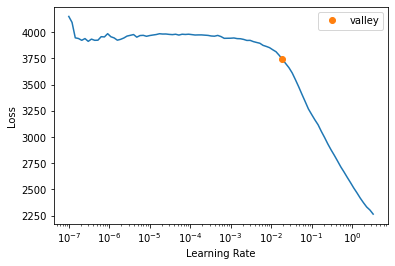

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
   actual  predicted
0   70.00      72.10
1   62.00      54.67
2   56.00      60.38
3   63.00      67.49
4   63.00      52.84
XGBoost RMSE:  21.504137


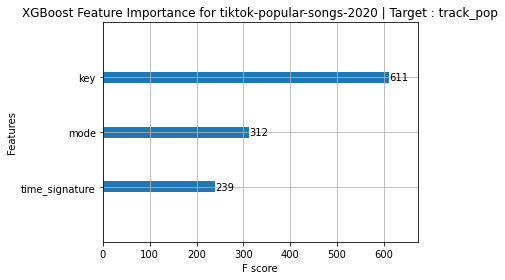

Target Variable: artist_pop
CATS=====================
['mode', 'key', 'time_signature']
CONTS=====================
['track_name', 'artist_name', 'album', 'track_pop', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'track_name_no_dollar']
18
Could not convert track_name to float.
Could not convert artist_name to float.
Could not convert album to float.
Could not convert track_name_no_dollar to float.
Looping through continuous variables to find breakpoint
Error with  track_name
Error with  artist_name
Error with  album
Error with  track_name_no_dollar
Continuous variables that made the cut : ['track_pop', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
Categorical variables that made the cut : ['mode', 'key', 'time_signature']
Tabular Object size: 292


  0%|          | 0/42 [00:00<?, ?it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': -0.023161466656450802, 'Adjusted R-Squared': -0.08000377035958706, 'RMSE': 14.377590683716312, 'Time taken': 0.025483131408691406}
{'Model': 'BaggingRegressor', 'R-Squared': -0.14281541932652453, 'Adjusted R-Squared': -0.20630516484466477, 'RMSE': 15.195047895024064, 'Time taken': 0.027365922927856445}
{'Model': 'BayesianRidge', 'R-Squared': -4.7578633328049236e-05, 'Adjusted R-Squared': -0.055605777446290805, 'RMSE': 14.21426339924184, 'Time taken': 0.009459257125854492}
{'Model': 'DecisionTreeRegressor', 'R-Squared': -0.13396908956935238, 'Adjusted R-Squared': -0.19696737232320527, 'RMSE': 15.136122566897455, 'Time taken': 0.008980512619018555}
{'Model': 'DummyRegressor', 'R-Squared': -7.000835003778683e-05, 'Adjusted R-Squared': -0.05562945325837321, 'RMSE': 14.214422, 'Time taken': 0.008188009262084961}
{'Model': 'ElasticNet', 'R-Squared': 0.0030255367580700465, 'Adjusted R-Squared': -0.0523619334220371, 'RMSE': 14.192406598305643, 'Time 

 17%|‚ñà‚ñã        | 7/42 [00:00<00:00, 47.32it/s]

{'Model': 'ElasticNetCV', 'R-Squared': -7.000098002896138e-05, 'Adjusted R-Squared': -0.05562944547891946, 'RMSE': 14.214422749337954, 'Time taken': 0.05900216102600098}
{'Model': 'ExtraTreeRegressor', 'R-Squared': -0.13396908956935238, 'Adjusted R-Squared': -0.19696737232320527, 'RMSE': 15.136122566897455, 'Time taken': 0.011060476303100586}


 29%|‚ñà‚ñà‚ñä       | 12/42 [00:00<00:00, 34.94it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': -0.12982134541086854, 'Adjusted R-Squared': -0.19258919793369467, 'RMSE': 15.108415339944816, 'Time taken': 0.11027216911315918}
GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution
{'Model': 'GaussianProcessRegressor', 'R-Squared': -0.11048031893444032, 'Adjusted R-Squared': -0.17217366998635364, 'RMSE': 14.978539208297743, 'Time taken': 0.022160053253173828}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.015365551652708698, 'Adjusted R-Squared': -0.03933636214436298, 'RMSE': 14.104300119370754, 'Time taken': 0.028310537338256836}
{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.03750807957119118, 'Adjusted R-Squared': -0.01596369378596485, 'RMSE': 13.944809118906432, 'Time taken': 0.09463024139404297}


 38%|‚ñà‚ñà‚ñà‚ñä      | 16/42 [00:00<00:01, 25.06it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.017732451296847307, 'Adjusted R-Squared': -0.036837968075550176, 'RMSE': 14.08733770797511, 'Time taken': 0.11431646347045898}
{'Model': 'HuberRegressor', 'R-Squared': 0.007722112029030281, 'Adjusted R-Squared': -0.04740443730269028, 'RMSE': 14.158938142158528, 'Time taken': 0.013571977615356445}
{'Model': 'KNeighborsRegressor', 'R-Squared': -0.3204974827022351, 'Adjusted R-Squared': -0.3938584539634704, 'RMSE': 16.333633, 'Time taken': 0.010475635528564453}
{'Model': 'KernelRidge', 'R-Squared': -22.44648077477328, 'Adjusted R-Squared': -23.749063040038465, 'RMSE': 68.82605237366879, 'Time taken': 0.020886659622192383}
{'Model': 'Lars', 'R-Squared': 0.033257164702310216, 'Adjusted R-Squared': -0.02045077059200584, 'RMSE': 13.97556931943535, 'Time taken': 0.014414072036743164}
{'Model': 'LarsCV', 'R-Squared': -7.000098002896138e-05, 'Adjusted R-Squared': -0.05562944547891946, 'RMSE': 14.214422749337954, 'Time taken': 0.0266518592

 50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 21/42 [00:00<00:00, 25.69it/s]

{'Model': 'LassoCV', 'R-Squared': -7.000098002896138e-05, 'Adjusted R-Squared': -0.05562944547891946, 'RMSE': 14.214422749337954, 'Time taken': 0.09465694427490234}
{'Model': 'LassoLars', 'R-Squared': -7.000098002896138e-05, 'Adjusted R-Squared': -0.05562944547891946, 'RMSE': 14.214422749337954, 'Time taken': 0.010200977325439453}
{'Model': 'LassoLarsCV', 'R-Squared': -7.000098002896138e-05, 'Adjusted R-Squared': -0.05562944547891946, 'RMSE': 14.214422749337954, 'Time taken': 0.017078638076782227}
{'Model': 'LassoLarsIC', 'R-Squared': -7.000098002896138e-05, 'Adjusted R-Squared': -0.05562944547891946, 'RMSE': 14.214422749337954, 'Time taken': 0.010617733001708984}
{'Model': 'LinearRegression', 'R-Squared': 0.033257164702310216, 'Adjusted R-Squared': -0.02045077059200584, 'RMSE': 13.97556931943535, 'Time taken': 0.009336233139038086}
{'Model': 'LinearSVR', 'R-Squared': -0.04392261125491448, 'Adjusted R-Squared': -0.10191831188018763, 'RMSE': 14.5227272113921, 'Time taken': 0.00980615615

 79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 33/42 [00:01<00:00, 17.45it/s]

{'Model': 'MLPRegressor', 'R-Squared': -6.72650359993645, 'Adjusted R-Squared': -7.155753799932919, 'RMSE': 39.50986386210838, 'Time taken': 0.7461967468261719}
{'Model': 'NuSVR', 'R-Squared': 0.01762189957533855, 'Adjusted R-Squared': -0.036954661559364776, 'RMSE': 14.088130432737236, 'Time taken': 0.019532203674316406}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.010677351598663565, 'Adjusted R-Squared': -0.04428501775696625, 'RMSE': 14.137838077403039, 'Time taken': 0.014162302017211914}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.010677351598663565, 'Adjusted R-Squared': -0.04428501775696625, 'RMSE': 14.137838077403039, 'Time taken': 0.02077198028564453}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -0.006793569136710476, 'Adjusted R-Squared': -0.0627265451998611, 'RMSE': 14.262125181881132, 'Time taken': 0.013902664184570312}
{'Model': 'PoissonRegressor', 'R-Squared': 0.03277719596115036, 'Adjusted R-Squared': -0.020957404263230117, 'RMSE': 13.979038186

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 42/42 [00:01<00:00, 21.26it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': -0.09584638441521154, 'Adjusted R-Squared': -0.1567267391049456, 'RMSE': 14.879518138322524, 'Time taken': 0.15001225471496582}
{'Model': 'Ridge', 'R-Squared': 0.03309437519501268, 'Adjusted R-Squared': -0.02062260396081994, 'RMSE': 13.976745940659674, 'Time taken': 0.00980377197265625}
{'Model': 'RidgeCV', 'R-Squared': 0.03169676475371619, 'Adjusted R-Squared': -0.022097859426633004, 'RMSE': 13.986843612967592, 'Time taken': 0.009580612182617188}
{'Model': 'SGDRegressor', 'R-Squared': 0.03328844790055818, 'Adjusted R-Squared': -0.02041774943829977, 'RMSE': 13.97534319723065, 'Time taken': 0.011387825012207031}
{'Model': 'SVR', 'R-Squared': 0.0007126652705068404, 'Adjusted R-Squared': -0.054803297770020576, 'RMSE': 14.20885947553447, 'Time taken': 0.01305842399597168}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.033257164702310216, 'Adjusted R-Squared': -0.02045077059200584, 'RMSE': 13.97556931943535, 'Time taken': 0.01003050804

LEARNING RATE: 0.1


Better model found at epoch 0 with _rmse value: 68.42454528808594.
Better model found at epoch 1 with _rmse value: 65.5260009765625.
Better model found at epoch 2 with _rmse value: 55.663509368896484.
Better model found at epoch 3 with _rmse value: 26.900150299072266.
Better model found at epoch 4 with _rmse value: 20.804576873779297.
Better model found at epoch 5 with _rmse value: 16.655637741088867.
No improvement since epoch 5: early stopping


<Figure size 432x288 with 0 Axes>

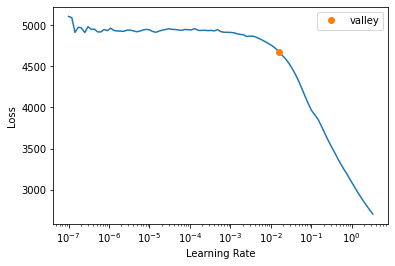

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
   actual  predicted
0   86.00      59.50
1   71.00      82.25
2   40.00      75.46
3   63.00      69.00
4   62.00      69.00
XGBoost RMSE:  14.997124


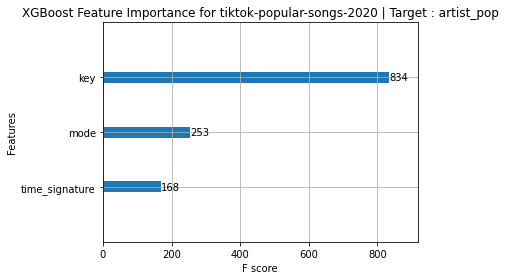

<Figure size 432x288 with 0 Axes>

In [15]:

if SEP_DOLLAR:
    #For every column in df, if the column contains a $, make a new column with the value without the $
    for col in df.columns:
        if '$' in df[col].to_string():
            df[col + '_no_dollar'] = df[col].str.replace('$', '').str.replace(',', '')


if SEP_PERCENT:
    #For every column in df, if the column contains a %, make a new column with the value without the %
    for col in df.columns:
        if '%' in df[col].to_string():
            df[col + '_no_percent'] = df[col].str.replace('%', '').str.replace(',', '')

target = ''
target_str = ''
#The column closest to the end isPARAM_DIR the target variable that can be represented as a float is the target variable
targets = []
#Loop through every possible target column (Continuous)
for i in range(len(df.columns)-1, 0, -1):
    try:
        df[df.columns[i]] = df[df.columns[i]].astype(float)
        target = df.columns[i]
        target_str = target.replace('/', '-')
    except:
        continue
    print(f'Target Variable: {target}')
    #Will be determined by the file name


    #===================================================================================================

    #Create project config files if they don't exist.
    if not os.path.exists(param_dir):
        #create param_dir
        os.makedirs(PARAM_DIR)
    if not os.path.exists(f'{PARAM_DIR}/cats.txt'):
        #create param_dir
        with open(f'{PARAM_DIR}/cats.txt', 'w') as f:
            f.write('')
    if not os.path.exists(f'{PARAM_DIR}/conts.txt'):
        #create param_dir
        with open(f'{PARAM_DIR}/conts.txt', 'w') as f:
            f.write('')
    if not os.path.exists(f'{PARAM_DIR}/cols_to_delete.txt'):
        with open(f'{PARAM_DIR}/cols_to_delete.txt', 'w') as f:
            f.write('')

    df = df.drop_duplicates()
    if SHUFFLE_DATA:
        df = df.sample(frac=1).reset_index(drop=True)

    # workaround for fastai/pytorch bug where bool is treated as object and thus erroring out.
    for n in df:
        if pd.api.types.is_bool_dtype(df[n]):
            df[n] = df[n].astype('uint8')

    with open(f'{PARAM_DIR}/cols_to_delete.txt', 'r') as f:
        cols_to_delete = f.read().splitlines()
    for col in cols_to_delete:
        try:
            del(df[col])
        except:
            pass
    #try to fill in missing values now, otherwise FastAI will do it for us later
    try:
        df = df.fillna(0)
    except:
        pass
    #print missing values
    #print(df.isna().sum().sort_values(ascending=False))
    #shrink df as much as possible
    df = df_shrink(df)


    #print types inside of df
    #print(df.dtypes)


    #Auto detect categorical and continuous variables
    #==============================================================================
    likely_cat = {}
    for var in df.columns:
        likely_cat[var] = 1.*df[var].nunique()/df[var].count() < 0.05 #or some other threshold

    cats = [var for var in df.columns if likely_cat[var]]
    conts = [var for var in df.columns if not likely_cat[var]]

    #remove target from lists
    try:
        conts.remove(target)
        cats.remove(target)
    except:
        pass
    #Convert target to float
    df[target] = df[target].astype(float)

    print('CATS=====================')
    print(cats)
    print('CONTS=====================')
    print(conts)

    #Populate categorical and continuous lists
    #==============================================================================

    if VARIABLE_FILES == True:
        with open(f'{PARAM_DIR}/cats.txt', 'r') as f:
            cats = f.read().splitlines()

        with open(f'{PARAM_DIR}/conts.txt', 'r') as f:
            conts = f.read().splitlines()

    #==============================================================================

    #==============================================================================
    procs = [Categorify, FillMissing, Normalize]
    #print(df.describe().T)
    df = df[0:SAMPLE_COUNT]
    splits = RandomSplitter()(range_of(df))

    print((len(cats)) + len(conts))
    #conts = []

    #Convert cont variables to floats
    #==============================================================================

    #Convert cont variables to floats
    #==============================================================================

    for var in conts:
        try:
            df[var] = df[var].astype(float)
        except:
            print(f'Could not convert {var} to float.')
            pass

    #==============================================================================

    #Experimental logic to add columns one-by-one to find a breakpoint
    #==============================================================================
    if ENABLE_BREAKPOINT == True:
        temp_procs = [Categorify, FillMissing]
        print('Looping through continuous variables to find breakpoint')
        cont_list = []
        for cont in conts:
            focus_cont = cont
            cont_list.append(cont)
            #print(focus_cont)
            try:
                to = TabularPandas(df, procs=procs, cat_names=cats, cont_names=cont_list, y_names=target, y_block=RegressionBlock(), splits=splits)
                del(to)
            except:
                print('Error with ', focus_cont)
                #remove focus_cont from list
                cont_list.remove(focus_cont)
                #traceback.print_exc()
                continue
        #convert all continuous variables to floats
        for var in cont_list:
            try:
                df[var] = df[var].astype(float)
            except:
                print(f'Could not convert {var} to float.')
                cont_list.remove(var)
                if CONVERT_TO_CAT == True:
                    cats.append(var)
                pass
        print(f'Continuous variables that made the cut : {cont_list}')
        print(f'Categorical variables that made the cut : {cats}')
        #shrink df as much as possible
        df = df_shrink(df)
        #print(df.dtypes)

    #==============================================================================

    #Creating tabular object + quick preprocessing
    #==============================================================================
    to = None
    if REGRESSOR == True:
        try:
            to = TabularPandas(df, procs, cats, conts, target, y_block=RegressionBlock(), splits=splits)
        except:
            conts = []
            to = TabularPandas(df, procs, cats, conts, target, y_block=RegressionBlock(), splits=splits)
    else:
        try:
            to = TabularPandas(df, procs, cats, conts, target, splits=splits)
        except:
            conts = []
            to = TabularPandas(df, procs, cats, conts, target, splits=splits)

    #print(dir(to))
    #print(to.xs)
    dls = to.dataloaders()
    print(f'Tabular Object size: {len(to)}')
    try:
        dls.one_batch()
    except:
        print(f'problem with getting one batch of {PROJECT_NAME}')
    #==============================================================================

    #Extracting train and test sets from tabular object
    #==============================================================================

    X_train, y_train = to.train.xs, to.train.ys.values.ravel()
    X_test, y_test = to.valid.xs, to.valid.ys.values.ravel()

    #Make sure target isn't in independent columns
    if target in X_train and target in X_test:
        del(X_train[target])
        del(X_test[target])
    #create dataframe from X_train and y_train
    #export tabular object to csv
    pd.DataFrame(X_train).to_csv(f'{PARAM_DIR}/X_train_{target_str}.csv', index=False)
    pd.DataFrame(X_test).to_csv(f'{PARAM_DIR}/X_test_{target_str}.csv', index=False)
    pd.DataFrame(y_train).to_csv(f'{PARAM_DIR}/y_train_{target_str}.csv', index=False)
    pd.DataFrame(y_test).to_csv(f'{PARAM_DIR}/y_test_{target_str}.csv', index=False)

    #==============================================================================

    #==============================================================================

    #Ready for model selection!

    if REGRESSOR == True:
        try:
            reg = LazyRegressor(verbose=2, ignore_warnings=False, custom_metric=None)
            models, predictions = reg.fit(X_train, X_test, y_train, y_test)
            print(f'Project: {PROJECT_NAME}')
            print(PROJECT_NAME)
            print(f'Target: {target}')
            print(target)
            target_std = y_train.std()
            print(f'Target Standard Deviation: {target_std}')
            print(models)
            models['project'] = PROJECT_NAME
            models['target'] = target
            models['target_std'] = target_std
            #rename index of 
            models.to_csv(f'{PARAM_DIR}/regression_results_{target_str}.csv', mode='a', header=True, index=True)
        except:
            print('Issue during lazypredict analysis')
    else:
        #TODO: remove this
        try:
            clf = LazyClassifier(verbose=2, ignore_warnings=False, custom_metric=None)
            models, predictions = clf.fit(X_train, X_test, y_train, y_test)
            print(f'Project: {PROJECT_NAME}')
            print(PROJECT_NAME)
            print(f'Target: {target}')
            print(target)
            print(f'Target Standard Deviation: {y_train.std()}')
            print(models)
            models.to_csv(f'{PARAM_DIR}/classification_results.csv', mode='a', header=False)
        except:
            print('Issue during lazypredict analysis')

    model_name = 'tabnet'

    # FastAI + pre-trained TabNet
    #==============================================================================
    learn = None
    i = 0
    while True:
        try:
            del learn
        except:
            pass
        try:
            learn = 0
            model = TabNetModel(get_emb_sz(to), len(to.cont_names), dls.c, n_d=64, n_a=64, n_steps=5, virtual_batch_size=256)
            # save the best model so far, determined by early stopping
            cbs = [SaveModelCallback(monitor='_rmse', comp=np.less, fname=f'{model_name}_{PROJECT_NAME}_{target_str}_best'), EarlyStoppingCallback()]
            learn = Learner(dls, model, loss_func=MSELossFlat(), metrics=rmse, cbs=cbs)
            #learn = get_learner(to)
            if(learn != 0):
                break
            if i > 50:
                break
        except:
            i += 1
            print('Error in FastAI TabNet')
            traceback.print_exc()
            continue
    try:
        #display learning rate finder results
        x = learn.lr_find()
    except:
        pass
    if AUTO_ADJUST_LEARNING_RATE == True:
        FASTAI_LEARNING_RATE = x.valley
    print(f'LEARNING RATE: {FASTAI_LEARNING_RATE}')
    try:
        if i < 50:
            learn.fit_one_cycle(20, FASTAI_LEARNING_RATE)
            plt.figure(figsize=(10, 10))
            try:
                ax = learn.show_results()
                plt.show(block=True)
            except:
                print('Could not show results')
                pass
    except:
        print('Could not fit model')
        traceback.print_exc()
        pass

    #==============================================================================

    #fit an xgboost model
    #==============================================================================
    if REGRESSOR == True:
        xgb = XGBRegressor()
    else:
        xgb = XGBClassifier()
    try:
        xgb = XGBRegressor()
        xgb.fit(X_train, y_train)
        y_pred = xgb.predict(X_test)
        print('XGBoost Predictions vs Actual==========')
        print(pd.DataFrame({'actual': y_test, 'predicted': y_pred}).head())
        print('XGBoost RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))
        #save feature importance plot to file
        plot_importance(xgb)
        plt.title(f'XGBoost Feature Importance for {PROJECT_NAME} | Target : {target}', wrap=True)
        plt.tight_layout()
        plt.show()
        plt.savefig(f'{PARAM_DIR}/xgb_feature_importance_{target_str}.png')
        fi_df = pd.DataFrame([xgb.get_booster().get_score()]).T
        fi_df.columns = ['importance']
        #create a column based off the index called feature
        fi_df['feature'] = fi_df.index
        #create a dataframe of feature importance
        fi_df = fi_df[['feature', 'importance']]
        fi_df.to_csv(f'{PARAM_DIR}/xgb_feature_importance_{target_str}.csv', index=False)
        #xgb_fi = pd.DataFrame(xgb.feature_importances_, index=X_train.columns, columns=['importance'])
        #xgb_fi.to_csv(f'{PARAM_DIR}/xgb_feature_importance_{target_str}.csv')
        #print('XGBoost AUC: ', roc_auc_score(y_test, y_pred))
    except:
        traceback.print_exc()
        print('XGBoost failed')

# <div style="text-align: center; background-color: blue; color: white; padding: 14px; line-height: 1;border-radius:20px">**Overall Feature Importance**</div>

          feature  importance
0  time_signature         102
1             key         452
2            mode         214
0             key         299
1  time_signature          40


<AxesSubplot:title={'center':'XGBoost Overall Feature Importance'}, xlabel='feature'>

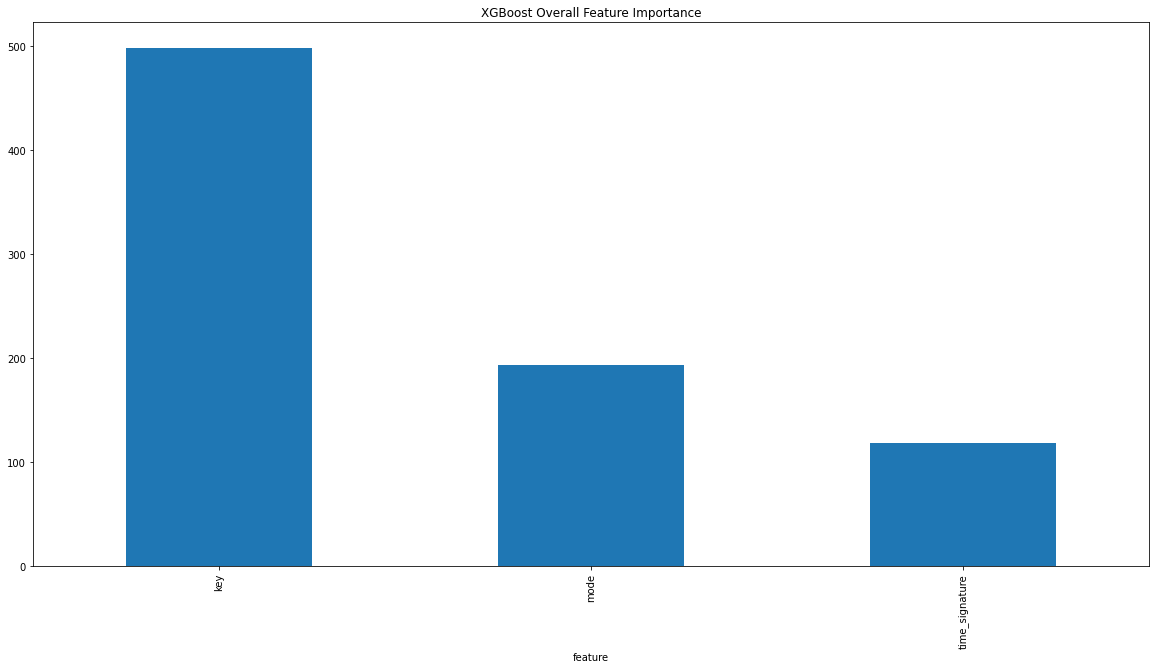

In [16]:
out_dir = f'./{PROJECT_NAME}'
xgb_feature_importance_csvs = []

for file in os.listdir(out_dir):
    if 'xgb_feature_importance' in file and '.csv' in file:
        xgb_feature_importance_csvs.append(pd.read_csv(os.path.join(out_dir, file)))

xgb_feature_importance = pd.concat(xgb_feature_importance_csvs,axis=0)
xgb_feature_importance.rename(columns={'Unnamed: 0': 'feature'}, inplace=True)
print(xgb_feature_importance.head())
xgb_feature_importance.groupby('feature')['importance'].mean().sort_values(ascending=False).plot(kind='bar', title='XGBoost Overall Feature Importance', figsize=(20, 10))

In [17]:
df.isna().sum()

track_name              0
artist_name             0
artist_pop              0
album                   0
track_pop               0
danceability            0
energy                  0
loudness                0
mode                    0
key                     0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
time_signature          0
duration_ms             0
track_name_no_dollar    0
dtype: int64

# **To Be Continued...**